In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [61]:
data = pd.read_csv('Train.csv')
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [62]:
data.shape

(8523, 12)

In [63]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [65]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
data['Item_Identifier'].nunique()

1559

In [67]:
data.select_dtypes(include=['object']).nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [9]:
data['Item_Fat_Content'].unique() #'Low Fat' , 'low fat' , 'LF' refer to the same thing
                                  #'Regular' and 'reg' refer to the same thing

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [68]:
data.replace({'low fat':'Low Fat', 
             'LF':'Low Fat',
             'reg':'Regular'}, inplace=True)

In [69]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [70]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [71]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [72]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#### Outlet Features:
<li>Outlet_Identifier
<li>Outlet_Size
<li>Outlet_Location_Type
<li>Outlet_Type
<li>Outlet_Establishment_Year

In [73]:
data['Outlet_Identifier'].nunique() , data['Outlet_Identifier'].unique()

(10,
 array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
        'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object))

In [74]:
data['Outlet_Size'].nunique() , data['Outlet_Size'].unique()

(3, array(['Medium', nan, 'High', 'Small'], dtype=object))

In [75]:
data['Outlet_Location_Type'].nunique() , data['Outlet_Location_Type'].unique()

(3, array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object))

In [76]:
data['Outlet_Type'].nunique() , data['Outlet_Type'].unique()

(4,
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object))

In [77]:
#Start with 'Outlet_Identifier'
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [78]:
data[data['Outlet_Identifier'] == 'OUT018']#['Outlet_Type'].nunique()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1              DRC01        5.920          Regular         0.019278   
5              FDP36       10.395          Regular         0.000000   
16             NCB42       11.800          Low Fat         0.008596   
31             NCS17       18.600          Low Fat         0.080829   
32             FDP33       18.700          Low Fat         0.000000   
...              ...          ...              ...              ...   
8506           DRF37       17.250          Low Fat         0.084676   
8511           FDF05       17.500          Low Fat         0.026980   
8515           FDH24       20.700          Low Fat         0.021518   
8516           NCJ19       18.600          Low Fat         0.118661   
8521           FDN46        7.210          Regular         0.145221   

               Item_Type  Item_MRP Outlet_Identifier  \
1            Soft Drinks   48.2692            OUT018   
5           Baking Goods   51.4008            OUT018   
16    Health and Hygiene  115.3492            OUT018   
31    Health and Hygiene   96.4436            OUT018   
32           Snack Foods  256.6672            OUT018   
...                  ...       ...               ...   
8506         Soft Drinks  263.1910            OUT018   
8511        Frozen Foods  262.5910            OUT018   
8515        Baking Goods  157.5288            OUT018   
8516              Others   58.7588            OUT018   
8521         Snack Foods  103.1332            OUT018   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1                          2009      Medium               Tier 3   
5                          2009      Medium               Tier 3   
16                         2009      Medium               Tier 3   
31                         2009      Medium               Tier 3   
32                         2009      Medium               Tier 3   
...                         ...         ...                  ...   
8506                       2009      Medium               Tier 3   
8511                       2009      Medium               Tier 3   
8515                       2009      Medium               Tier 3   
8516                       2009      Medium               Tier 3   
8521                       2009      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
1     Supermarket Type2           443.4228  
5     Supermarket Type2           556.6088  
16    Supermarket Type2          1621.8888  
31    Supermarket Type2          2741.7644  
32    Supermarket Type2          3068.0064  
...                 ...                ...  
8506  Supermarket Type2          3944.8650  
8511  Supermarket Type2          4207.8560  
8515  Supermarket Type2          1571.2880  
8516  Supermarket Type2           858.8820  
8521  Supermarket Type2          1845.5976  

[928 rows x 12 columns]

In [79]:
data.groupby('Outlet_Identifier').agg('count')

Item_Identifier  Item_Weight  Item_Fat_Content  \
Outlet_Identifier                                                   
OUT010                         555          555               555   
OUT013                         932          932               932   
OUT017                         926          926               926   
OUT018                         928          928               928   
OUT019                         528            0               528   
OUT027                         935            0               935   
OUT035                         930          930               930   
OUT045                         929          929               929   
OUT046                         930          930               930   
OUT049                         930          930               930   

                   Item_Visibility  Item_Type  Item_MRP  \
Outlet_Identifier                                         
OUT010                         555        555       555   
OUT013                         932        932       932   
OUT017                         926        926       926   
OUT018                         928        928       928   
OUT019                         528        528       528   
OUT027                         935        935       935   
OUT035                         930        930       930   
OUT045                         929        929       929   
OUT046                         930        930       930   
OUT049                         930        930       930   

                   Outlet_Establishment_Year  Outlet_Size  \
Outlet_Identifier                                           
OUT010                                   555            0   
OUT013                                   932          932   
OUT017                                   926            0   
OUT018                                   928          928   
OUT019                                   528          528   
OUT027                                   935          935   
OUT035                                   930          930   
OUT045                                   929            0   
OUT046                                   930          930   
OUT049                                   930          930   

                   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
Outlet_Identifier                                                        
OUT010                              555          555                555  
OUT013                              932          932                932  
OUT017                              926          926                926  
OUT018                              928          928                928  
OUT019                              528          528                528  
OUT027                              935          935                935  
OUT035                              930          930                930  
OUT045                              929          929                929  
OUT046                              930          930                930  
OUT049                              930          930                930

In [80]:
data.isnull().sum()[['Item_Weight','Outlet_Size']]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

<b>Note:</b>
<li> 'OUT019' and 'OUT027' both don't have any data in Item_Weight column [528 + 935 = 1463]nulls</li>
<li>'OUT010' , 'OUT017' and 'OUT045' don't have any data in Outlet_Size column [555 + 926 +929 = 2410]nulls</li>

Nothing needs to be changed in column 'Outlet_Identifier' 

In [81]:
data['Outlet_Establishment_Year'].nunique() , data['Outlet_Establishment_Year'].unique()

(9, array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64))

In [82]:
data.groupby(['Outlet_Identifier','Outlet_Establishment_Year']).agg('count')

Item_Identifier  Item_Weight  \
Outlet_Identifier Outlet_Establishment_Year                                 
OUT010            1998                                   555          555   
OUT013            1987                                   932          932   
OUT017            2007                                   926          926   
OUT018            2009                                   928          928   
OUT019            1985                                   528            0   
OUT027            1985                                   935            0   
OUT035            2004                                   930          930   
OUT045            2002                                   929          929   
OUT046            1997                                   930          930   
OUT049            1999                                   930          930   

                                             Item_Fat_Content  \
Outlet_Identifier Outlet_Establishment_Year                     
OUT010            1998                                    555   
OUT013            1987                                    932   
OUT017            2007                                    926   
OUT018            2009                                    928   
OUT019            1985                                    528   
OUT027            1985                                    935   
OUT035            2004                                    930   
OUT045            2002                                    929   
OUT046            1997                                    930   
OUT049            1999                                    930   

                                             Item_Visibility  Item_Type  \
Outlet_Identifier Outlet_Establishment_Year                               
OUT010            1998                                   555        555   
OUT013            1987                                   932        932   
OUT017            2007                                   926        926   
OUT018            2009                                   928        928   
OUT019            1985                                   528        528   
OUT027            1985                                   935        935   
OUT035            2004                                   930        930   
OUT045            2002                                   929        929   
OUT046            1997                                   930        930   
OUT049            1999                                   930        930   

                                             Item_MRP  Outlet_Size  \
Outlet_Identifier Outlet_Establishment_Year                          
OUT010            1998                            555            0   
OUT013            1987                            932          932   
OUT017            2007                            926            0   
OUT018            2009                            928          928   
OUT019            1985                            528          528   
OUT027            1985                            935          935   
OUT035            2004                            930          930   
OUT045            2002                            929            0   
OUT046            1997                            930          930   
OUT049            1999                            930          930   

                                             Outlet_Location_Type  \
Outlet_Identifier Outlet_Establishment_Year                         
OUT010            1998                                        555   
OUT013            1987                                        932   
OUT017            2007                                        926   
OUT018            2009                                        928   
OUT019            1985                                        528   
OUT027            1985                                        935   
OUT035            2004                       

#### Dealing with nulls in Outlet_Size

In [83]:
data.groupby('Outlet_Identifier').agg(pd.unique).sort_values('Outlet_Location_Type')

Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Outlet_Identifier                                                               
OUT019                                  1985       Small               Tier 1   
OUT046                                  1997       Small               Tier 1   
OUT049                                  1999      Medium               Tier 1   
OUT017                                  2007         NaN               Tier 2   
OUT035                                  2004       Small               Tier 2   
OUT045                                  2002         NaN               Tier 2   
OUT010                                  1998         NaN               Tier 3   
OUT013                                  1987        High               Tier 3   
OUT018                                  2009      Medium               Tier 3   
OUT027                                  1985      Medium               Tier 3   

                         Outlet_Type  
Outlet_Identifier                     
OUT019                 Grocery Store  
OUT046             Supermarket Type1  
OUT049             Supermarket Type1  
OUT017             Supermarket Type1  
OUT035             Supermarket Type1  
OUT045             Supermarket Type1  
OUT010                 Grocery Store  
OUT013             Supermarket Type1  
OUT018             Supermarket Type2  
OUT027             Supermarket Type3

In [84]:
data.groupby('Outlet_Identifier').agg(pd.unique).sort_values('Outlet_Type')

Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Outlet_Identifier                                                               
OUT010                                  1998         NaN               Tier 3   
OUT019                                  1985       Small               Tier 1   
OUT013                                  1987        High               Tier 3   
OUT017                                  2007         NaN               Tier 2   
OUT035                                  2004       Small               Tier 2   
OUT045                                  2002         NaN               Tier 2   
OUT046                                  1997       Small               Tier 1   
OUT049                                  1999      Medium               Tier 1   
OUT018                                  2009      Medium               Tier 3   
OUT027                                  1985      Medium               Tier 3   

                         Outlet_Type  
Outlet_Identifier                     
OUT010                 Grocery Store  
OUT019                 Grocery Store  
OUT013             Supermarket Type1  
OUT017             Supermarket Type1  
OUT035             Supermarket Type1  
OUT045             Supermarket Type1  
OUT046             Supermarket Type1  
OUT049             Supermarket Type1  
OUT018             Supermarket Type2  
OUT027             Supermarket Type3

In [85]:
data.groupby('Outlet_Identifier').agg(pd.unique).loc[['OUT010','OUT017','OUT045']]

Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Outlet_Identifier                                                               
OUT010                                  1998         NaN               Tier 3   
OUT017                                  2007         NaN               Tier 2   
OUT045                                  2002         NaN               Tier 2   

                         Outlet_Type  
Outlet_Identifier                     
OUT010                 Grocery Store  
OUT017             Supermarket Type1  
OUT045             Supermarket Type1

In [86]:
#as the only other 'Grocery Store' was also 'Small' this outlet would also be 'Small' 
out010_idx=data['Outlet_Identifier']=='OUT010'
data.loc[out010_idx,'Outlet_Size'] = 'Small'

In [87]:
data.groupby('Outlet_Identifier').agg(pd.unique).loc[['OUT010','OUT017','OUT045']]

Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Outlet_Identifier                                                               
OUT010                                  1998       Small               Tier 3   
OUT017                                  2007         NaN               Tier 2   
OUT045                                  2002         NaN               Tier 2   

                         Outlet_Type  
Outlet_Identifier                     
OUT010                 Grocery Store  
OUT017             Supermarket Type1  
OUT045             Supermarket Type1

In [88]:
#Both remaining outlets have the same 'Outlet_Type' and 'Outlet_Location_Type' so will have same treatment 
#'OUT035' have same features and has close Outlet_Establishment_Year as well thus 'Small' will be used 
out017_045_idx=data['Outlet_Identifier'].isin(['OUT017','OUT045'])
data.loc[out017_045_idx,'Outlet_Size'] = 'Small'

In [89]:
data.groupby('Outlet_Identifier').agg(pd.unique).loc[['OUT010','OUT017','OUT045']]

Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Outlet_Identifier                                                               
OUT010                                  1998       Small               Tier 3   
OUT017                                  2007       Small               Tier 2   
OUT045                                  2002       Small               Tier 2   

                         Outlet_Type  
Outlet_Identifier                     
OUT010                 Grocery Store  
OUT017             Supermarket Type1  
OUT045             Supermarket Type1

In [90]:
data.groupby('Outlet_Identifier').agg(pd.unique).sort_values('Outlet_Type')

Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Outlet_Identifier                                                               
OUT010                                  1998       Small               Tier 3   
OUT019                                  1985       Small               Tier 1   
OUT013                                  1987        High               Tier 3   
OUT017                                  2007       Small               Tier 2   
OUT035                                  2004       Small               Tier 2   
OUT045                                  2002       Small               Tier 2   
OUT046                                  1997       Small               Tier 1   
OUT049                                  1999      Medium               Tier 1   
OUT018                                  2009      Medium               Tier 3   
OUT027                                  1985      Medium               Tier 3   

                         Outlet_Type  
Outlet_Identifier                     
OUT010                 Grocery Store  
OUT019                 Grocery Store  
OUT013             Supermarket Type1  
OUT017             Supermarket Type1  
OUT035             Supermarket Type1  
OUT045             Supermarket Type1  
OUT046             Supermarket Type1  
OUT049             Supermarket Type1  
OUT018             Supermarket Type2  
OUT027             Supermarket Type3

In [91]:
data.Outlet_Type.isna().sum()

0

#### Dealing with nulls in Item_Weight

In [92]:
#Check if all Item_types are found as well
data['Item_Type'].nunique(), data[data['Item_Weight'].isna()]['Item_Type'].nunique()

(16, 16)

In [93]:
#Check if all items have missing weight
data['Item_Identifier'].nunique() , data[data['Item_Weight'].isna()]['Item_Identifier'].nunique() 

(1559, 1142)

In [94]:
data.sort_values('Item_Identifier')[['Item_Identifier', 'Item_Type', 'Item_Weight']]

Item_Identifier    Item_Type  Item_Weight
8043           DRA12  Soft Drinks        11.60
118            DRA12  Soft Drinks        11.60
1693           DRA12  Soft Drinks        11.60
1197           DRA12  Soft Drinks        11.60
1245           DRA12  Soft Drinks        11.60
...              ...          ...          ...
7926           NCZ54    Household        14.65
214            NCZ54    Household        14.65
1896           NCZ54    Household          NaN
7166           NCZ54    Household          NaN
7738           NCZ54    Household        14.65

[8523 rows x 3 columns]

In [95]:
data[data['Item_Identifier']=='DRA12']['Item_Weight'].std()

0.0

In [38]:
#Checking if each Item_Identifier has its fixed weight 


data.groupby('Item_Identifier')['Item_Weight'].agg('std').sum()

0


In [98]:
items_weights = data.groupby('Item_Identifier')['Item_Weight'].agg('mean') #mean=median=min=max=mode so any could be used

items_weights

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [99]:
items_weights.isna().sum()

4

In [100]:
#4 Items have no weight recorded at all
missing_items = items_weights[items_weights.isna()]
missing_items

Item_Identifier
FDE52   NaN
FDK57   NaN
FDN52   NaN
FDQ60   NaN
Name: Item_Weight, dtype: float64

In [101]:
missing_items = missing_items.index
missing_items

Index(['FDE52', 'FDK57', 'FDN52', 'FDQ60'], dtype='object', name='Item_Identifier')

In [102]:
data[data['Item_Identifier'].isin(missing_items)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
927       Medium               Tier 3  Supermarket Type3          1569.9564  
1922      Medium               Tier 3  Supermarket Type3          4434.2280  
4187      Medium               Tier 3  Supermarket Type3          3453.5046  
5022       Small               Tier 1      Grocery Store           120.5098

In [104]:
missing_types = data[data['Item_Weight'].isna()]['Item_Type'].unique() 
missing_types

array(['Snack Foods', 'Hard Drinks', 'Baking Goods', 'Canned',
       'Fruits and Vegetables', 'Dairy', 'Frozen Foods', 'Household',
       'Breakfast', 'Soft Drinks', 'Meat', 'Health and Hygiene',
       'Starchy Foods', 'Others', 'Seafood', 'Breads'], dtype=object)

In [105]:
data[data['Item_Identifier'].isin(missing_items)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
927       Medium               Tier 3  Supermarket Type3          1569.9564  
1922      Medium               Tier 3  Supermarket Type3          4434.2280  
4187      Medium               Tier 3  Supermarket Type3          3453.5046  
5022       Small               Tier 1      Grocery Store           120.5098

In [106]:
data[data['Item_Type'].isin(missing_types)].groupby('Item_Type')[['Item_Weight', 'Item_MRP']].describe()

Item_Weight                                        \
                            count       mean       std    min       25%   
Item_Type                                                                 
Baking Goods                536.0  12.277108  4.773622  4.880   8.23500   
Breads                      204.0  11.346936  4.440540  4.635   7.12875   
Breakfast                    89.0  12.768202  5.038131  6.425   8.06000   
Canned                      539.0  12.305705  4.586564  4.615   8.11500   
Dairy                       566.0  13.426069  4.686532  4.805   9.27750   
Frozen Foods                718.0  12.867061  4.507383  4.555   8.93500   
Fruits and Vegetables      1019.0  13.224769  4.575275  5.460   9.19500   
Hard Drinks                 183.0  11.400328  4.239144  4.610   8.26000   
Health and Hygiene          430.0  13.142314  4.512313  5.175   9.69500   
Household                   759.0  13.384736  4.998845  5.030   8.69500   
Meat                        337.0  12.817344  4.670812  5.150   9.30000   
Others                      137.0  13.853285  4.225534  5.500  10.65000   
Seafood                      51.0  12.552843  5.473830  5.365   7.42000   
Snack Foods                 988.0  12.987880  4.531256  5.095   9.19500   
Soft Drinks                 374.0  11.847460  4.403699  4.590   8.26000   
Starchy Foods               130.0  13.690731  4.010061  6.695  11.50000   

                                            Item_MRP                         \
                          50%    75%    max    count        mean        std   
Item_Type                                                                     
Baking Goods           11.650  15.75  20.85    648.0  126.380766  58.059573   
Breads                 10.600  14.85  20.85    251.0  140.952669  63.499685   
Breakfast              10.695  17.25  21.10    110.0  141.788151  58.457031   
Canned                 12.150  16.25  21.35    649.0  139.763832  60.811624   
Dairy                  13.350  17.60  20.70    682.0  148.499208  70.326744   
Frozen Foods           12.850  17.00  20.85    856.0  138.503366  67.455074   
Fruits and Vegetables  13.100  17.10  21.35   1232.0  144.581235  60.475899   
Hard Drinks            10.100  14.85  19.70    214.0  137.077928  62.023378   
Health and Hygiene     12.150  17.60  21.25    520.0  130.818921  59.379481   
Household              13.150  18.35  21.25    910.0  149.424753  62.394009   
Meat                   12.350  17.20  21.25    425.0  139.882032  58.117456   
Others                 14.500  17.75  20.50    169.0  132.851430  58.684694   
Seafood                11.650  17.75  20.75     64.0  141.841719  58.622816   
Snack Foods            13.150  16.85  21.25   1200.0  146.194934  58.898002   
Soft Drinks            11.800  15.35  20.75    445.0  131.492506  60.752561   
Starchy Foods          13.175  16.70  21.20    148.0  147.838023  69.293224   

                                                                          
                           min        25%       50%        75%       max  
Item_Type                                                                 
Baking Goods           33.9874   84.06775  112.3544  170.99220  265.5568  
Breads                 31.9558   91.31460  129.1310  194.72940  263.6594  
Breakfast              40.0480   99.86080  155.3630  178.31200  234.9300  
Canned                 36.3506   89.88040  140.1496  184.59240  266.8884  
Dairy                  33.4874   88.82705  147.5405  213.37180  266.6884  
Frozen Foods           31.9558   83.69935  128.6494  190.58460  264.8910  
Fruits and Vegetables  36.2506   98.39100  145.5444  188.47930  264.2252  
Hard Drinks            34.2532  106.31880  144.9444  177.68440  261.4278  
Health and Hygiene     33.1216   95.39165  128.0349  163.85130  266.6884  
Household              32.4558  107.76220  153.3182  191.59975  264.7910  
Meat                   34.7532   98.30420  146.5734  185.26080  261.5936  
Others                 35.0190   84.09080  1

In [107]:
data[(data['Item_Type']=='Frozen Foods') & (data['Item_Fat_Content']=='Regular') 
     & (data['Item_MRP']>80) & (data['Item_MRP']<93)].describe()

Item_Weight  Item_Visibility   Item_MRP  Outlet_Establishment_Year  \
count    26.000000        30.000000  30.000000                  30.000000   
mean     14.191154         0.051625  85.674507                1997.500000   
std       5.285782         0.040944   3.253408                   8.443524   
min       6.115000         0.000000  81.161800                1985.000000   
25%       9.195000         0.013374  83.174350                1987.000000   
50%      16.000000         0.058296  84.825000                1998.500000   
75%      19.250000         0.079248  87.485600                2004.000000   
max      20.500000         0.132112  92.448800                2009.000000   

       Item_Outlet_Sales  
count          30.000000  
mean         1271.589227  
std           777.473811  
min           165.118400  
25%           886.179800  
50%          1225.737800  
75%          1659.839400  
max          3858.976800

In [108]:
def get_info(item):
    idx = data['Item_Identifier'] == item
    i_type, i_MRP, i_FC  = data.loc[idx, ['Item_Type', 'Item_MRP', 'Item_Fat_Content']].values[0]
    return i_type, i_MRP, i_FC

In [109]:
missing_items[0], get_info(missing_items[0])

('FDE52', ('Dairy', 88.9514, 'Regular'))

In [110]:
for item in missing_items:
    i_type, i_MRP, i_FC = get_info(item)
    idxs = (data['Item_Type']==i_type) & (data['Item_Fat_Content']==i_FC) & (data['Item_MRP']>i_MRP-1) & (data['Item_MRP']<i_MRP+1)
    items_weights[item] = data.loc[idxs, 'Item_Weight'].median()

In [111]:
items_weights.isna().sum()

0

In [112]:
data[idxs].describe()

Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
count      5.00000         8.000000    8.000000                   8.000000   
mean       8.27800         0.039746  121.259150                1996.125000   
std        3.67386         0.065383    0.577854                   9.991961   
min        6.63500         0.000000  120.309800                1985.000000   
25%        6.63500         0.004752  121.034150                1985.000000   
50%        6.63500         0.006357  121.259800                1998.000000   
75%        6.63500         0.053642  121.434800                2003.250000   
max       14.85000         0.191501  122.207200                2009.000000   

       Item_Outlet_Sales  
count            8.00000  
mean          2094.77325  
std           1495.35994  
min            120.50980  
25%           1114.71565  
50%           2289.68620  
75%           2876.58890  
max           4287.75200

In [113]:
for item, weight in items_weights.items():
    data.loc[data['Item_Identifier']==item ,'Item_Weight'] = weight

In [114]:
data.isna().sum()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
data.duplicated().sum()

0

In [116]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [117]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [118]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.875536         0.066132   140.992782                1997.831867   
std       4.646052         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026989    93.826500                1987.000000   
50%      12.650000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

## Visualization 

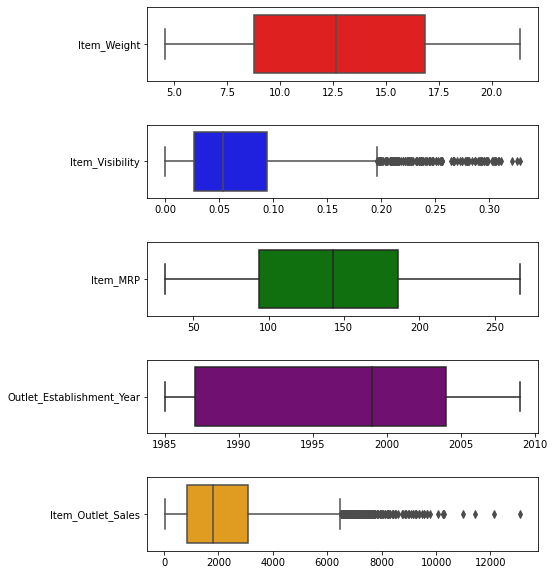

In [119]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(7,10))
for i, j in enumerate(data._get_numeric_data().columns):
    plt.subplot(5,1,i+1)
    #sns.histplot(data[i])
    sns.boxplot(data=data[j],color=colors[i],orient='h')
    plt.yticks([0],[j])
    

plt.subplots_adjust(hspace=0.6)

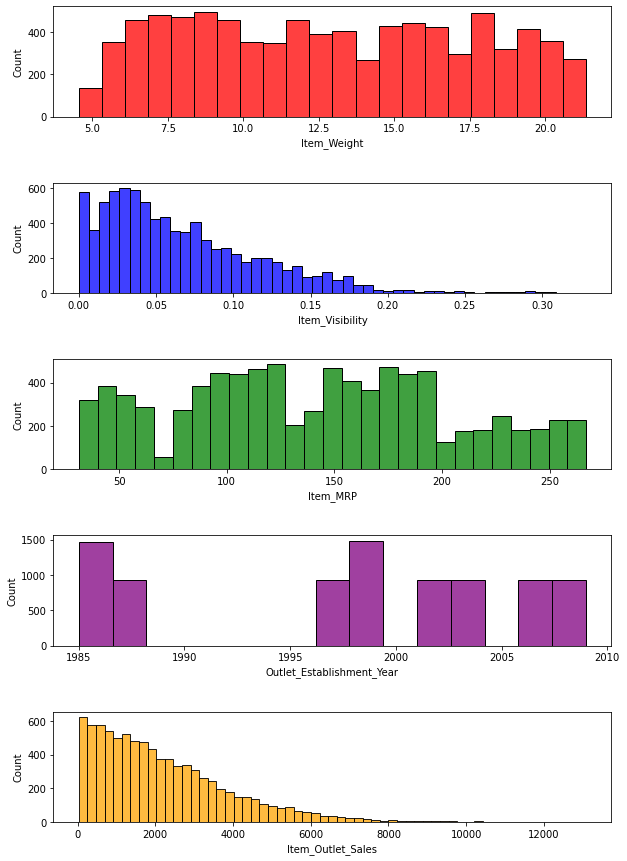

In [120]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(10,15))
for i, j in enumerate(data._get_numeric_data().columns):
    plt.subplot(5,1,i+1)
    sns.histplot(data[j], color=colors[i])
    #sns.boxplot(data=data[j],orient='h')
    #plt.yticks([0],[j])
    

plt.subplots_adjust(hspace=0.6)

In [121]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1
iqr

Item_Weight                     8.065000
Item_Visibility                 0.067596
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
dtype: float64

In [122]:
#Setting upper and lower limits for values not to be considered outliers 
limit_lower  = q1-1.5*iqr
limit_upper = q3+1.5*iqr

In [123]:
(data<limit_lower).sum()

C:\Users\HP15~1\AppData\Local\Temp/ipykernel_14304/1794942227.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (data<limit_lower).sum()


Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

In [124]:
(data>limit_upper).sum()

C:\Users\HP15~1\AppData\Local\Temp/ipykernel_14304/2410887315.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (data>limit_upper).sum()


Item_Fat_Content               0
Item_Identifier                0
Item_MRP                       0
Item_Outlet_Sales            186
Item_Type                      0
Item_Visibility              144
Item_Weight                    0
Outlet_Establishment_Year      0
Outlet_Identifier              0
Outlet_Location_Type           0
Outlet_Size                    0
Outlet_Type                    0
dtype: int64

In [125]:
limit_upper

Item_Weight                    28.947500
Item_Visibility                 0.195979
Item_MRP                      323.369500
Outlet_Establishment_Year    2029.500000
Item_Outlet_Sales            6501.869900
dtype: float64

In [126]:
data[data['Item_Visibility']>limit_upper['Item_Visibility']]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02       10.195          Regular         0.255395   
83             NCL18       18.850          Low Fat         0.293418   
108            DRE60        9.395          Low Fat         0.278974   
174            FDI32       17.700          Low Fat         0.291865   
334            FDC41       15.600          Low Fat         0.204700   
...              ...          ...              ...              ...   
8292           FDF56       16.700          Regular         0.209163   
8345           FDY28        7.470          Regular         0.266397   
8371           DRA59        8.270          Regular         0.214125   
8432           FDI16       14.000          Regular         0.227261   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   
83                Household  194.6136            OUT019   
108             Soft Drinks  225.3720            OUT019   
174   Fruits and Vegetables  115.1834            OUT010   
334            Frozen Foods   76.8670            OUT019   
...                     ...       ...               ...   
8292  Fruits and Vegetables  179.1976            OUT019   
8345           Frozen Foods  215.6218            OUT019   
8371            Soft Drinks  183.9924            OUT010   
8432           Frozen Foods   54.3640            OUT010   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
49                         1985       Small               Tier 1   
83                         1985       Small               Tier 1   
108                        1985       Small               Tier 1   
174                        1998       Small               Tier 3   
334                        1985       Small               Tier 1   
...                         ...         ...                  ...   
8292                       1985       Small               Tier 1   
8345                       1985       Small               Tier 1   
8371                       1998       Small               Tier 3   
8432                       1998       Small               Tier 3   
8509                       1998       Small               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
49    Grocery Store           780.3176  
83    Grocery Store           583.2408  
108   Grocery Store           679.1160  
174   Grocery Store           345.5502  
334   Grocery Store           229.7010  
...             ...                ...  
8292  Grocery Store           543.2928  
8345  Grocery Store           641.1654  
8371  Grocery Store           185.0924  
8432  Grocery Store           159.7920  
8509  Grocery Store           424.7804  

[144 rows x 12 columns]

In [127]:
data.select_dtypes(include=['int64','float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [128]:
data.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

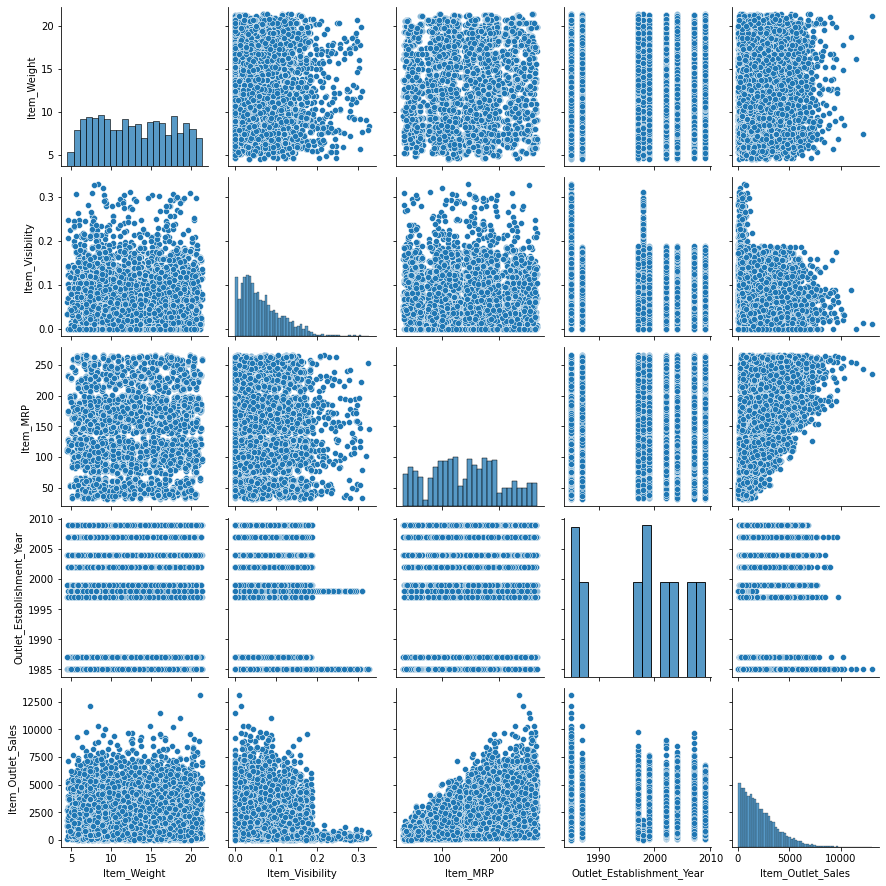

In [129]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

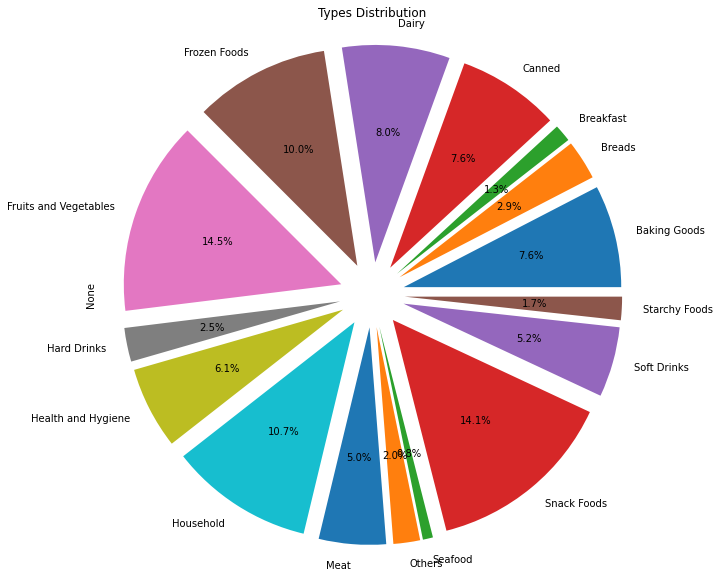

In [130]:
types = data.groupby('Item_Type').size()
explode = [0.15 for i in range(types.shape[0])]

types.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', explode=explode)
plt.title('Types Distribution')
plt.show()

<Figure size 720x720 with 0 Axes>

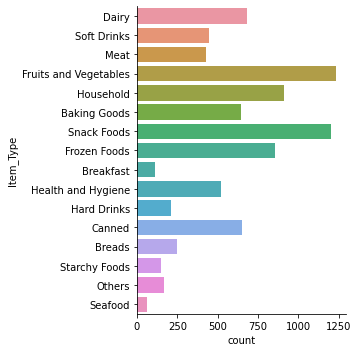

In [131]:
plt.figure(figsize=(10,10))
sns.catplot(y='Item_Type', kind="count", data=data)
plt.show()

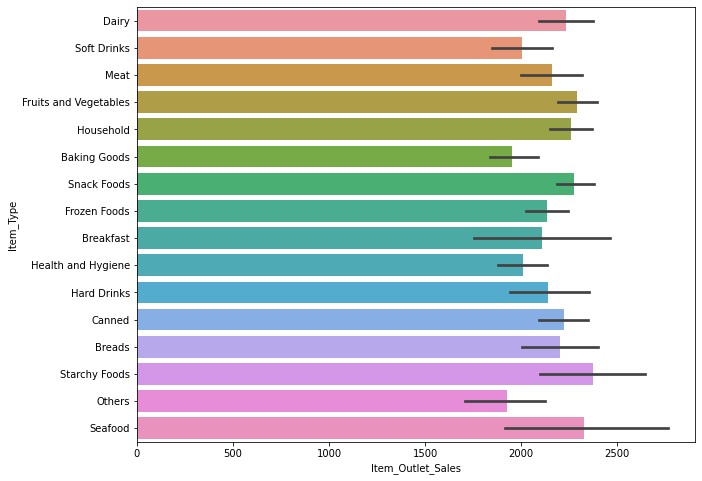

In [132]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=data)
plt.show()

In [133]:
item_types_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].agg(['mean','sum']).reset_index()
item_types_sales

Item_Type         mean           sum
0            Baking Goods  1952.971207  1.265525e+06
1                  Breads  2204.132226  5.532372e+05
2               Breakfast  2111.808651  2.322990e+05
3                  Canned  2225.194904  1.444151e+06
4                   Dairy  2232.542597  1.522594e+06
5            Frozen Foods  2132.867744  1.825735e+06
6   Fruits and Vegetables  2289.009592  2.820060e+06
7             Hard Drinks  2139.221622  4.577934e+05
8      Health and Hygiene  2010.000265  1.045200e+06
9               Household  2258.784300  2.055494e+06
10                   Meat  2158.977911  9.175656e+05
11                 Others  1926.139702  3.255176e+05
12                Seafood  2326.065928  1.488682e+05
13            Snack Foods  2277.321739  2.732786e+06
14            Soft Drinks  2006.511735  8.928977e+05
15          Starchy Foods  2374.332773  3.514013e+05

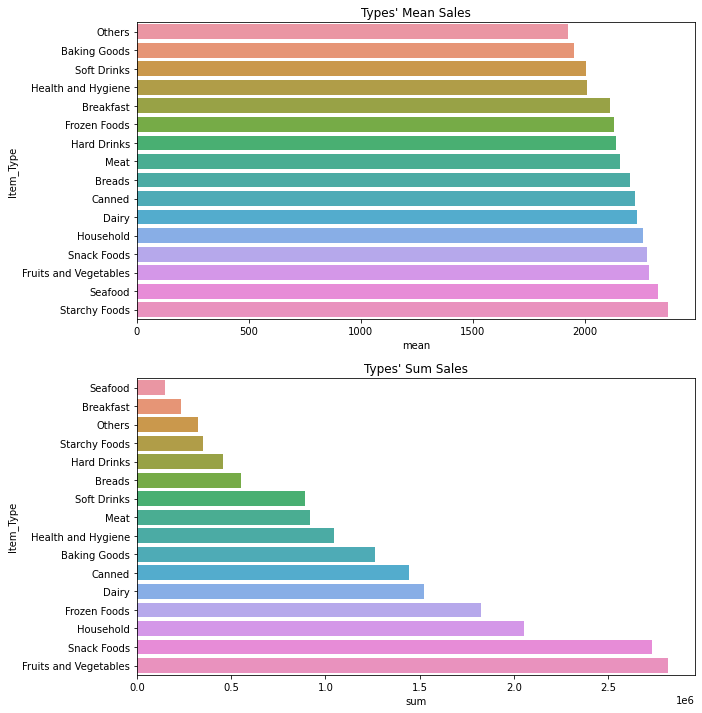

In [134]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.barplot(y='Item_Type', x='mean', data=item_types_sales.sort_values('mean'))
plt.title('Types\' Mean Sales')

plt.subplot(2,1,2)
sns.barplot(y='Item_Type', x='sum', data=item_types_sales.sort_values('sum'))
plt.title('Types\' Sum Sales')

plt.subplots_adjust(hspace=0.2)

Text(0.5, 1.0, "Types' Mean MRP")

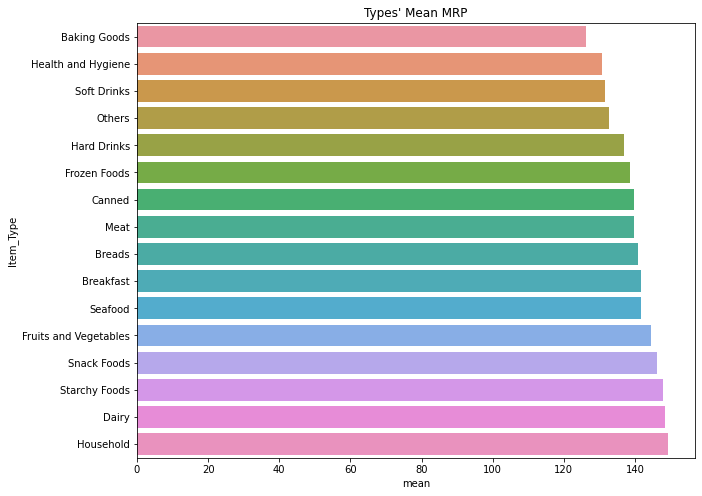

In [135]:
item_types_mrp = data.groupby('Item_Type')['Item_MRP'].agg(['mean']).reset_index()

plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='mean', data=item_types_mrp.sort_values('mean'))
plt.title('Types\' Mean MRP')

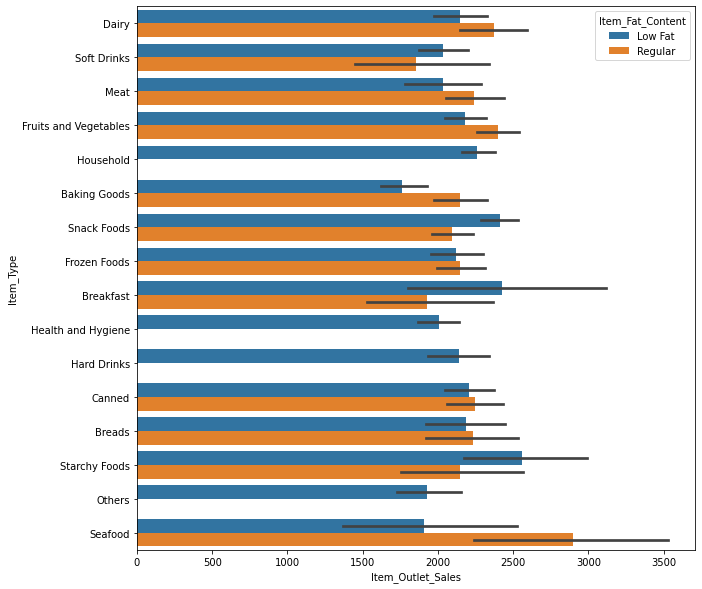

In [136]:
plt.figure(figsize=(10,10))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', hue='Item_Fat_Content', data=data)
plt.show()

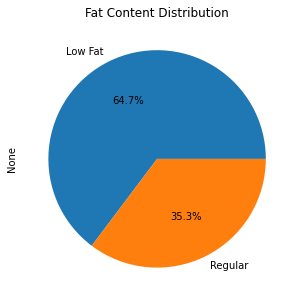

In [137]:
fat_content = data.groupby('Item_Fat_Content').size()

fat_content.plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')
plt.title('Fat Content Distribution')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

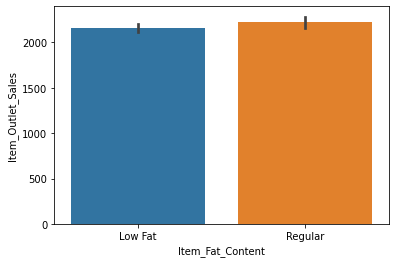

In [138]:
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

In [139]:
item_fc = data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].agg(['mean','sum', 'count']).reset_index()
item_fc

Item_Fat_Content         mean           sum  count
0          Low Fat  2157.711534  1.190409e+07   5517
1          Regular  2224.561170  6.687031e+06   3006

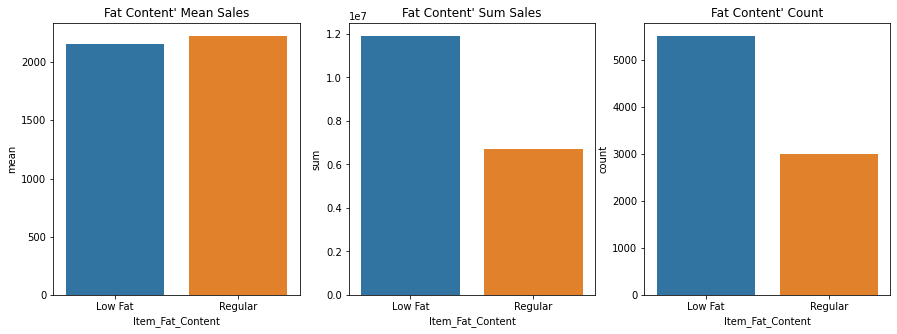

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x='Item_Fat_Content', y='mean', data=item_fc)#.sort_values('mean'))
plt.title('Fat Content\' Mean Sales')

plt.subplot(1,3,2)
sns.barplot(x='Item_Fat_Content', y='sum', data=item_fc)#.sort_values('sum'))
plt.title('Fat Content\' Sum Sales')

plt.subplot(1,3,3)
sns.barplot(x='Item_Fat_Content', y='count', data=item_fc)#.sort_values('sum'))
plt.title('Fat Content\' Count')

plt.subplots_adjust(hspace=0.5)

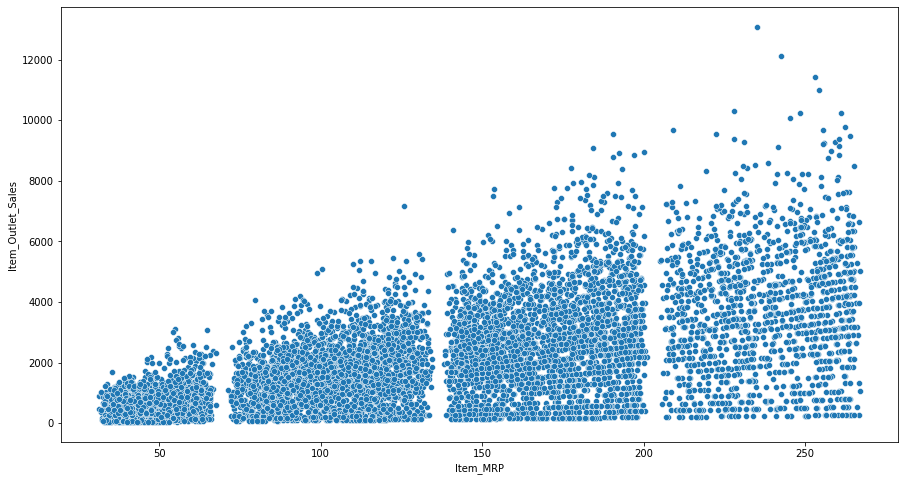

In [141]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)
plt.show()

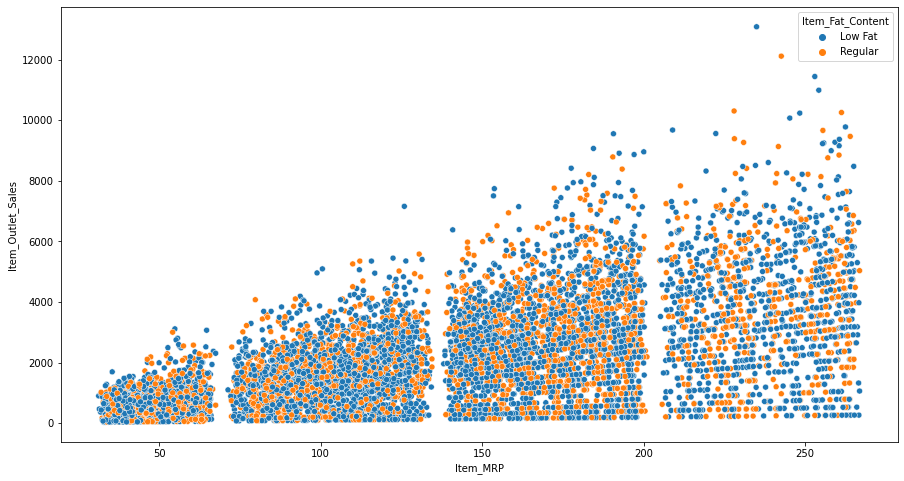

In [142]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=data)
plt.show()

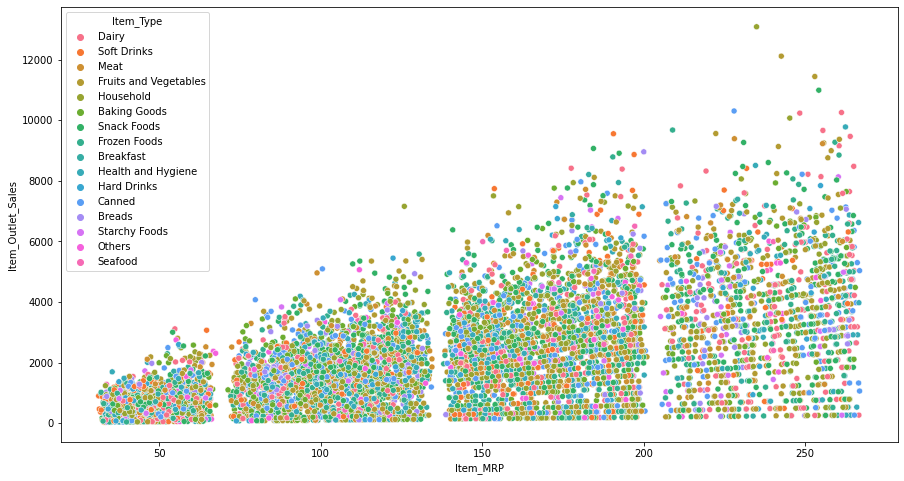

In [143]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type', data=data)
plt.show()

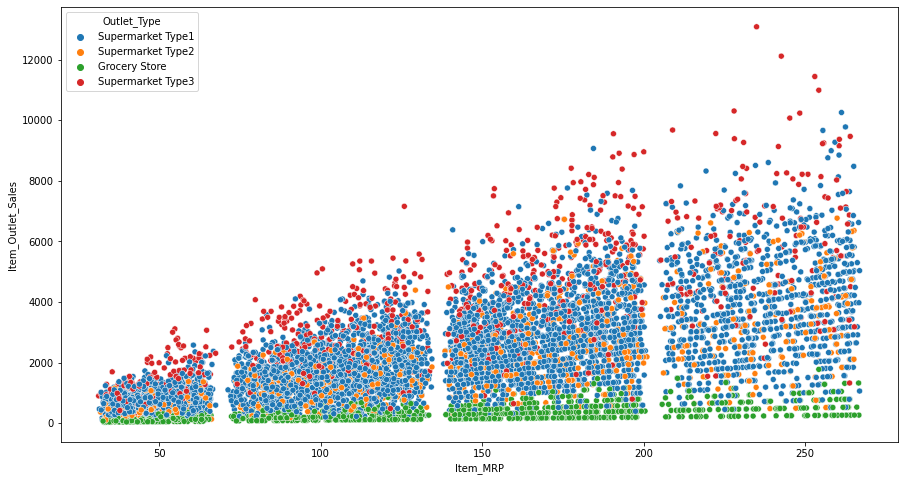

In [144]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)
plt.show()

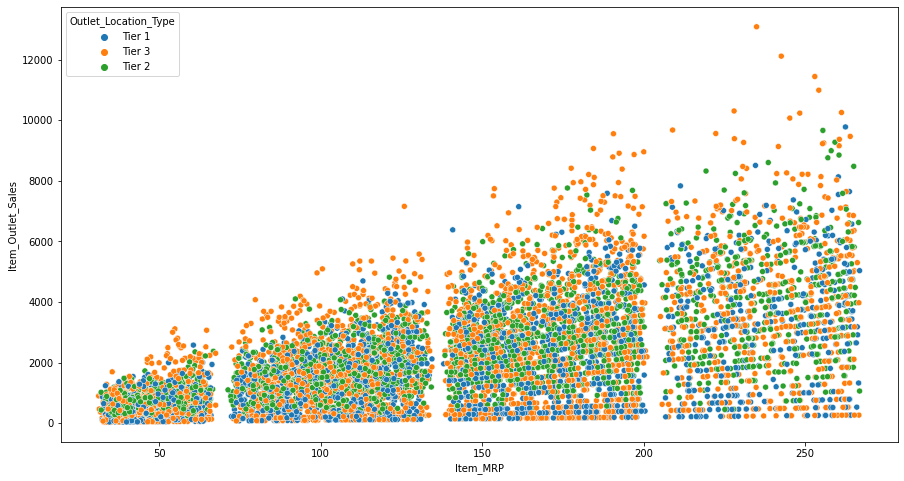

In [145]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=data)
plt.show()

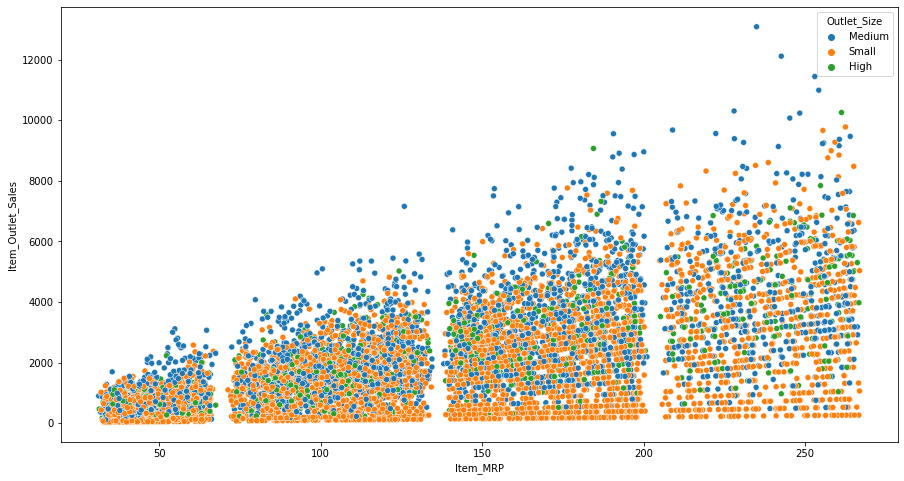

In [146]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Size', data=data)
plt.show()

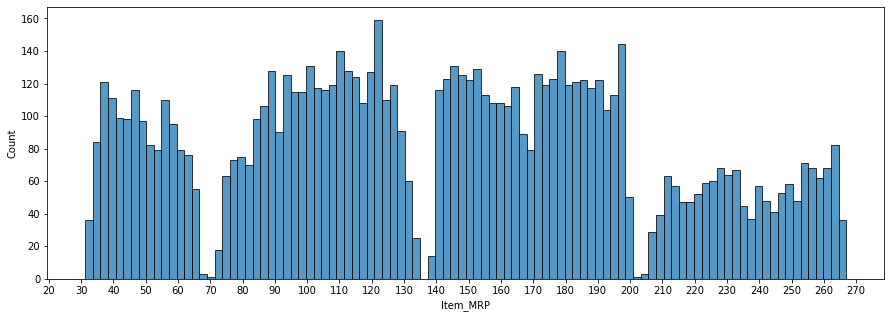

In [147]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Item_MRP', bins=100).set_xticks(range(20, 280, 10))
plt.show()

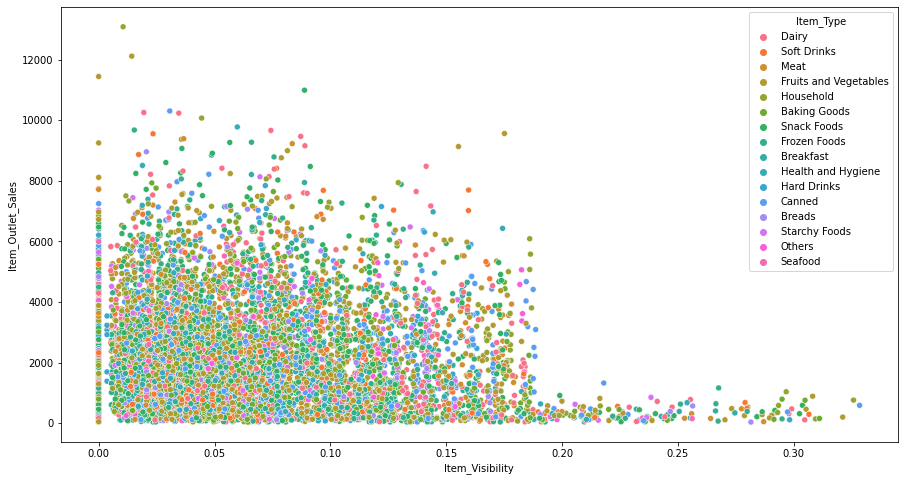

In [148]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', data=data)
plt.show()

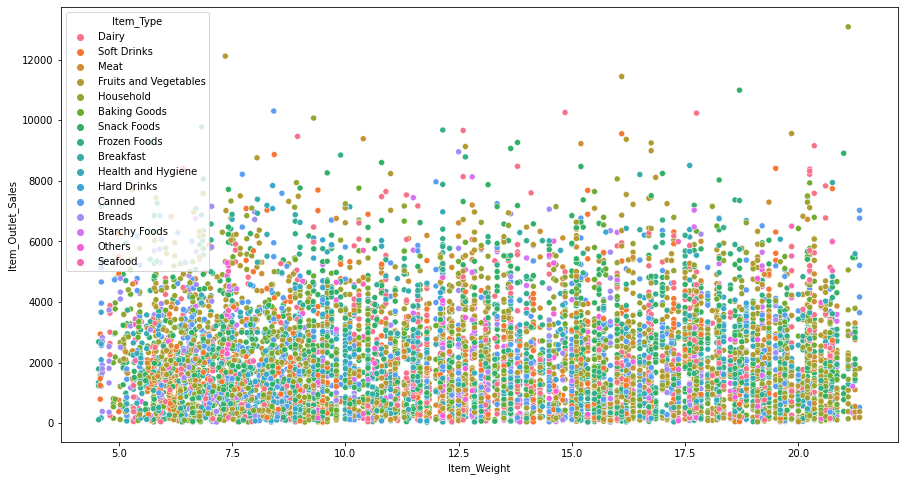

In [149]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Type', data=data)
plt.show()

In [150]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

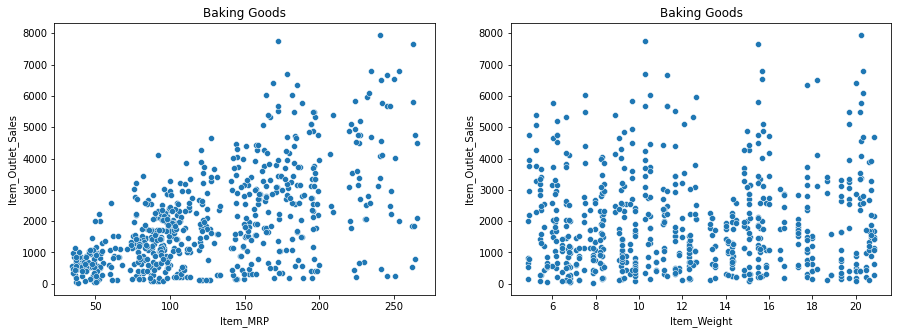

<Figure size 432x288 with 0 Axes>

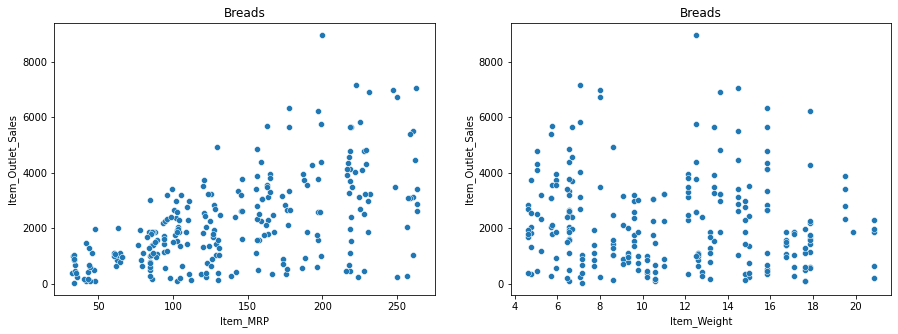

<Figure size 432x288 with 0 Axes>

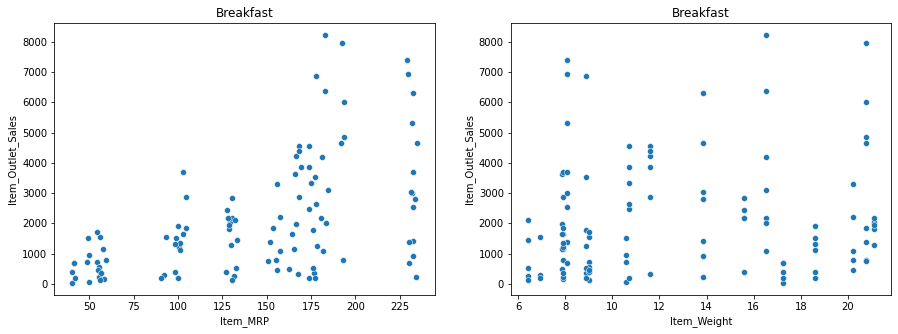

<Figure size 432x288 with 0 Axes>

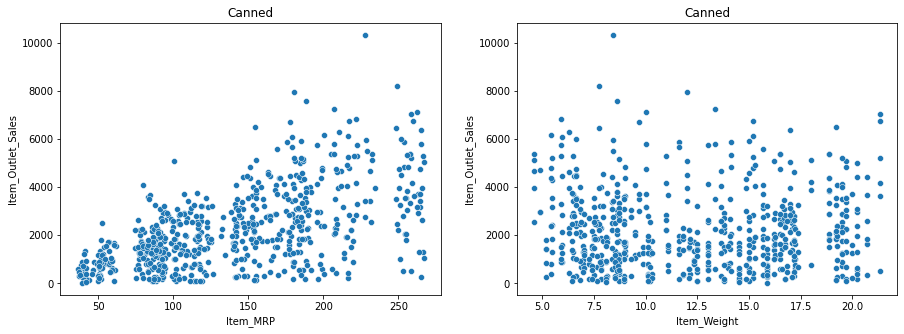

<Figure size 432x288 with 0 Axes>

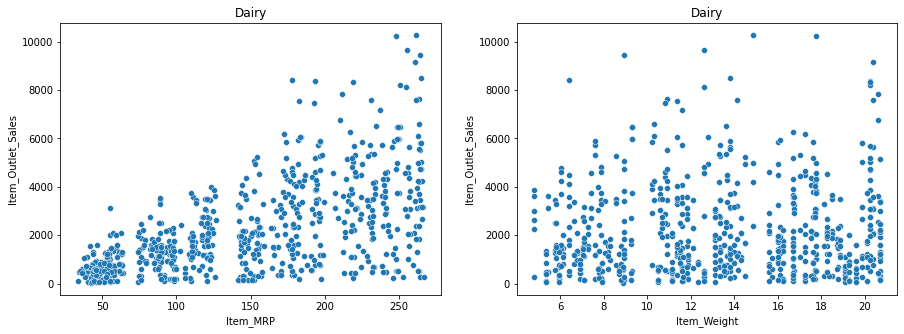

<Figure size 432x288 with 0 Axes>

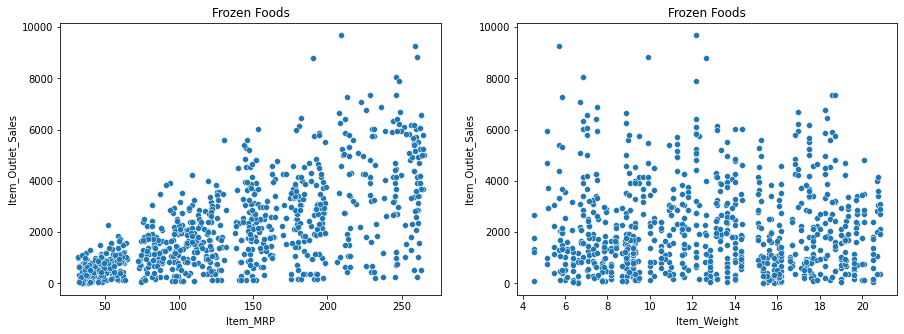

<Figure size 432x288 with 0 Axes>

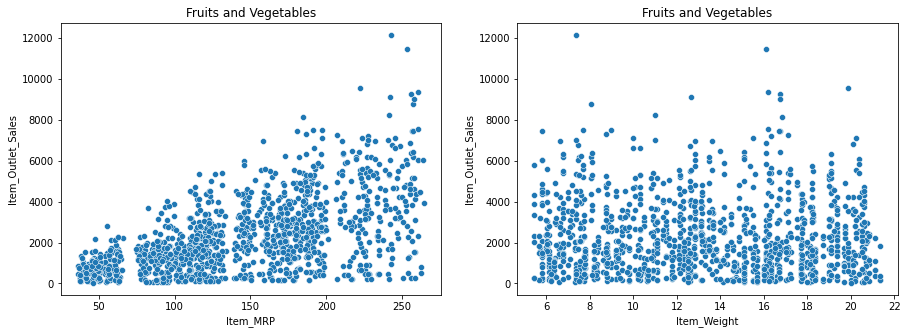

<Figure size 432x288 with 0 Axes>

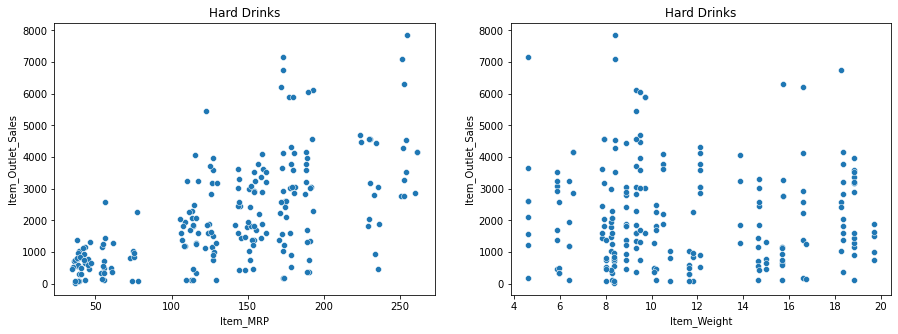

<Figure size 432x288 with 0 Axes>

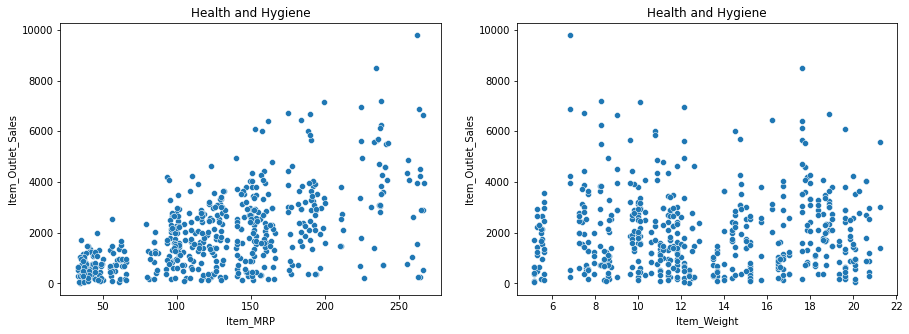

<Figure size 432x288 with 0 Axes>

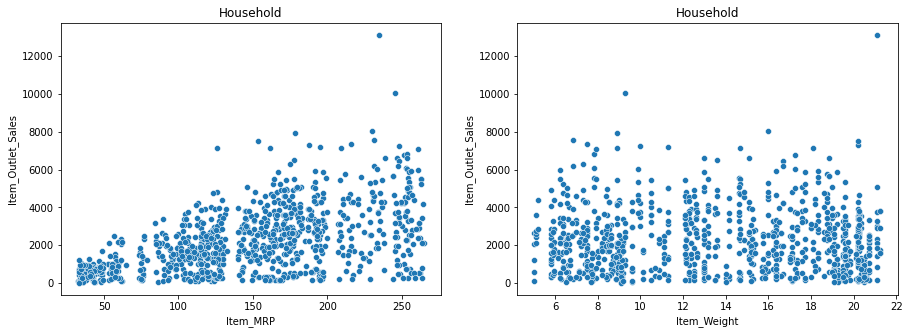

<Figure size 432x288 with 0 Axes>

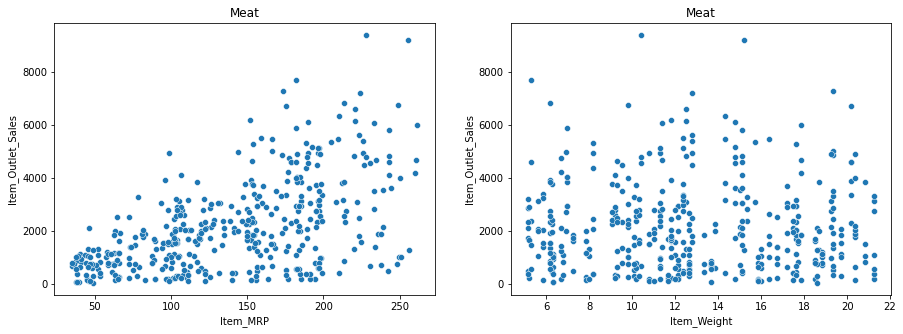

<Figure size 432x288 with 0 Axes>

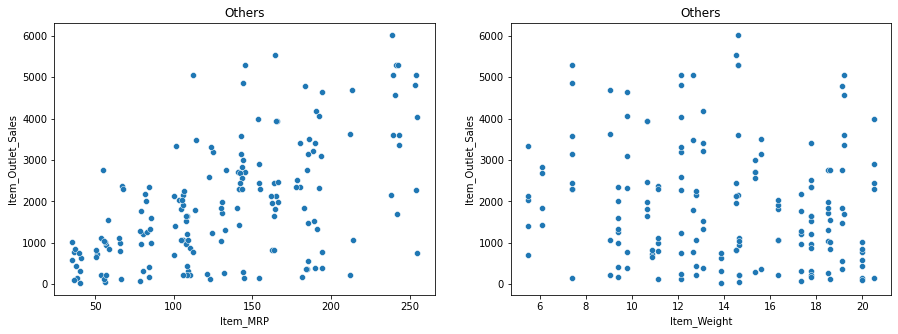

<Figure size 432x288 with 0 Axes>

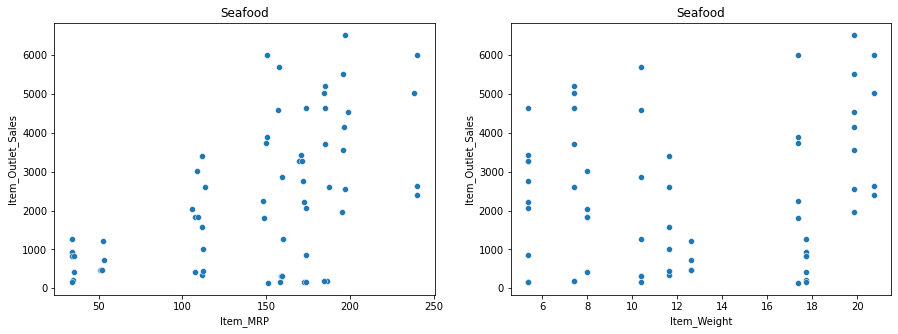

<Figure size 432x288 with 0 Axes>

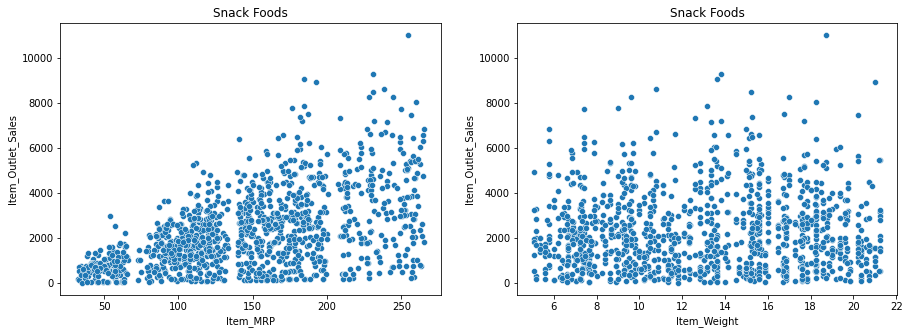

<Figure size 432x288 with 0 Axes>

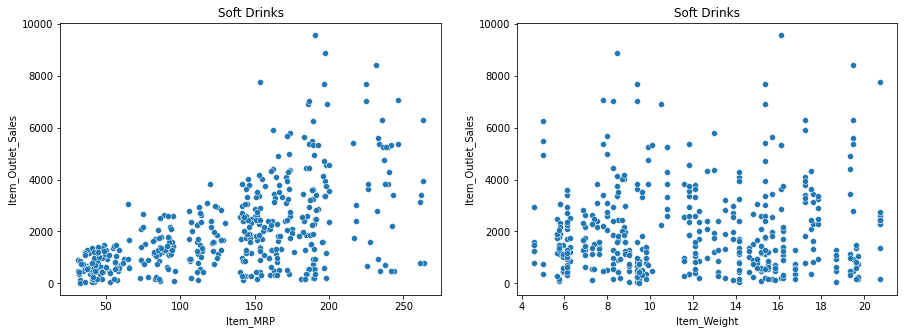

<Figure size 432x288 with 0 Axes>

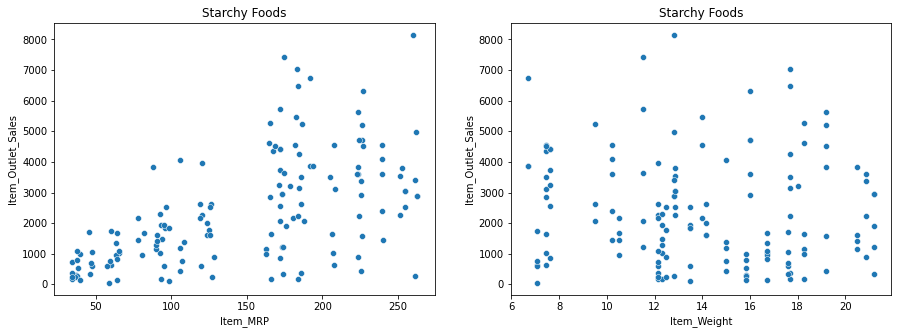

<Figure size 432x288 with 0 Axes>

In [151]:
data_by_type = data.groupby('Item_Type')
for name, group in data_by_type:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=group)
    plt.title(name)

    plt.subplot(1,2,2)
    sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=group)
    plt.title(name)
    
    plt.show()
    plt.subplots_adjust(hspace=0.5)

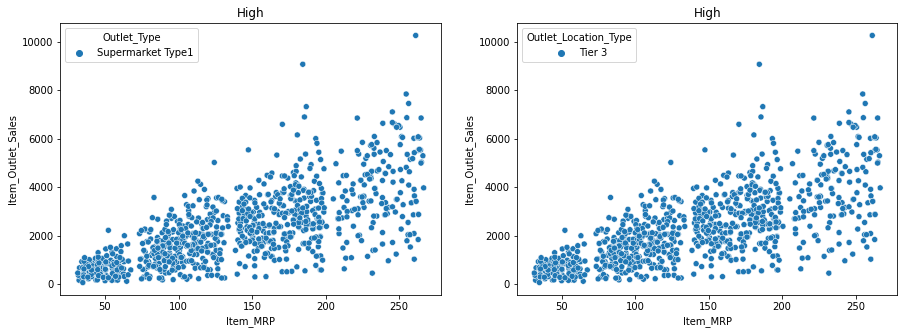

<Figure size 432x288 with 0 Axes>

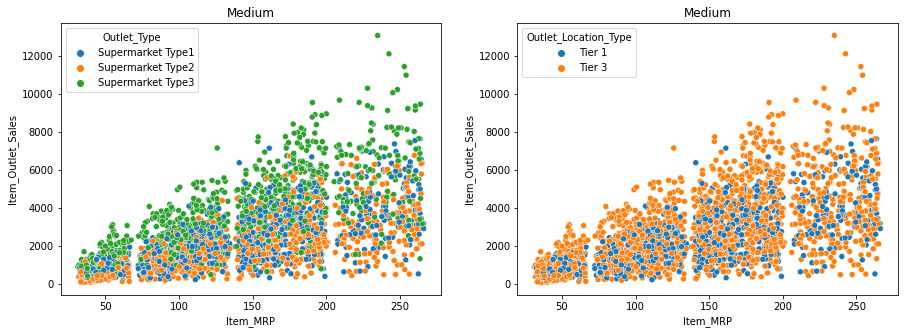

<Figure size 432x288 with 0 Axes>

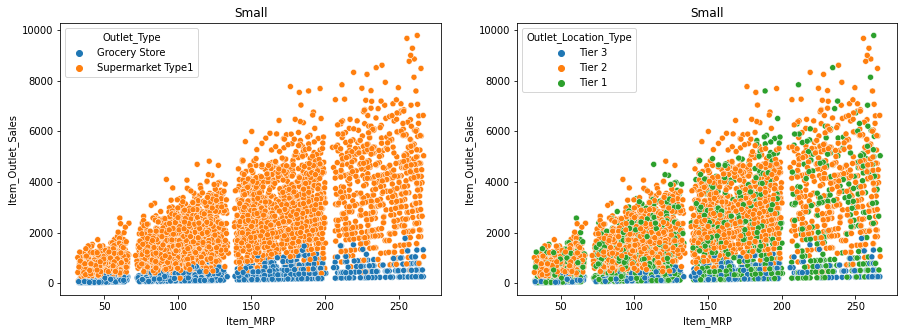

<Figure size 432x288 with 0 Axes>

In [152]:
data_by_size = data.groupby('Outlet_Size')
for name, group in data_by_size:
    plt.figure(figsize=(15,5))
        
    plt.subplot(1,2,1)
    sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=group)
    plt.title(name)

    plt.subplot(1,2,2)
    sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=group)
    plt.title(name)
    
    plt.show()
    plt.subplots_adjust(hspace=0.5)

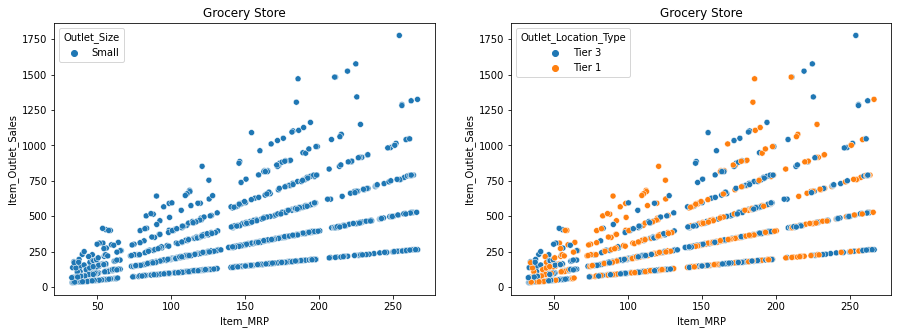

<Figure size 432x288 with 0 Axes>

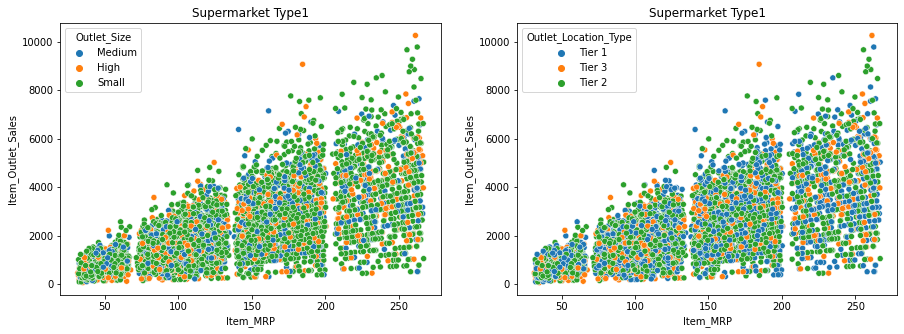

<Figure size 432x288 with 0 Axes>

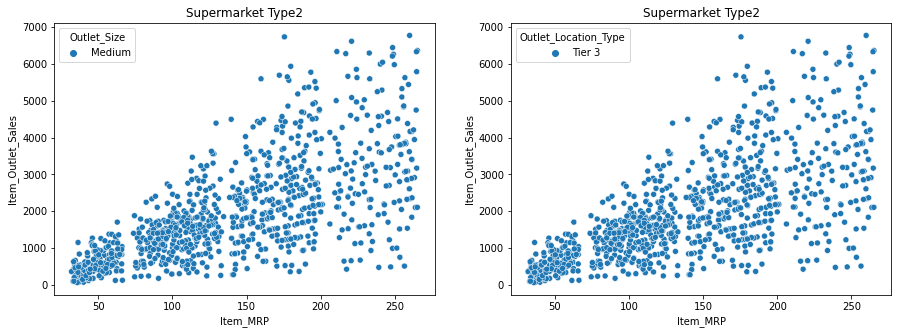

<Figure size 432x288 with 0 Axes>

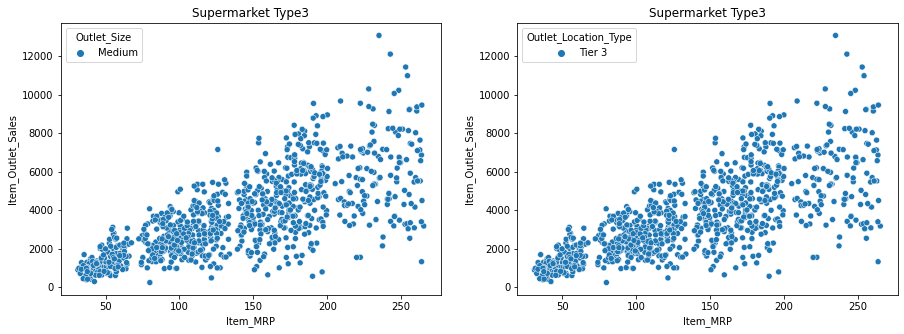

<Figure size 432x288 with 0 Axes>

In [153]:
data_by_type = data.groupby('Outlet_Type')
for name, group in data_by_type:
    plt.figure(figsize=(15,5))
        
    plt.subplot(1,2,1)
    sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Size', data=group)
    plt.title(name)

    plt.subplot(1,2,2)
    sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=group)
    plt.title(name)
    
    plt.show()
    plt.subplots_adjust(hspace=0.5)

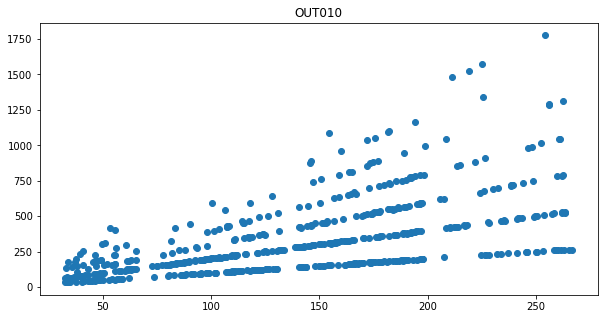

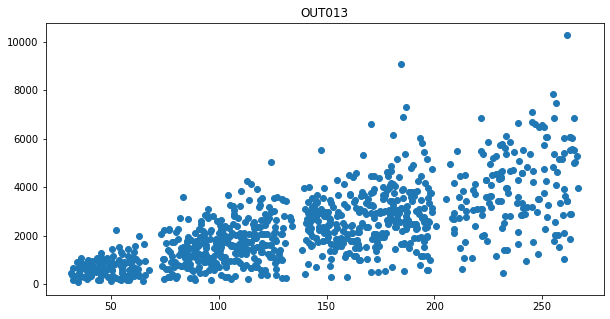

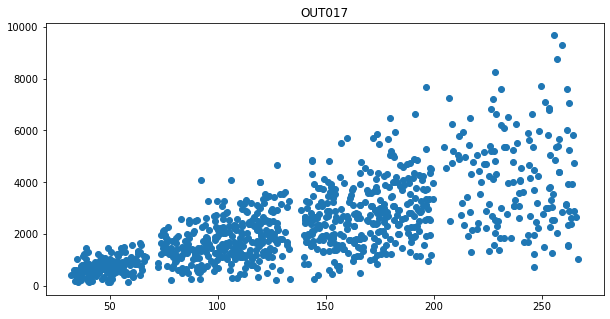

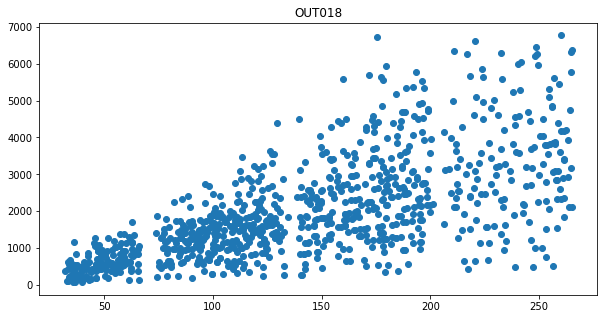

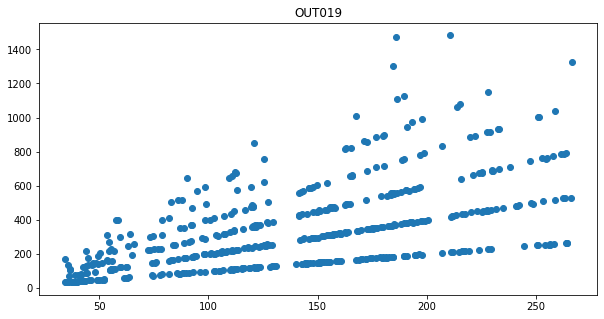

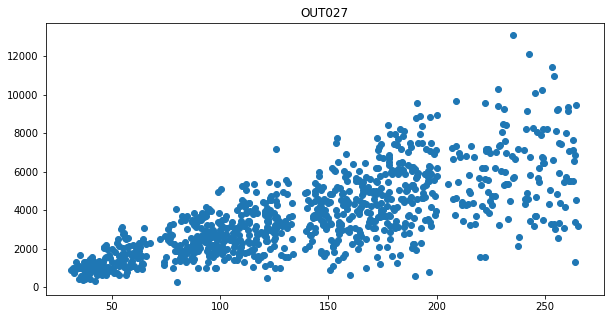

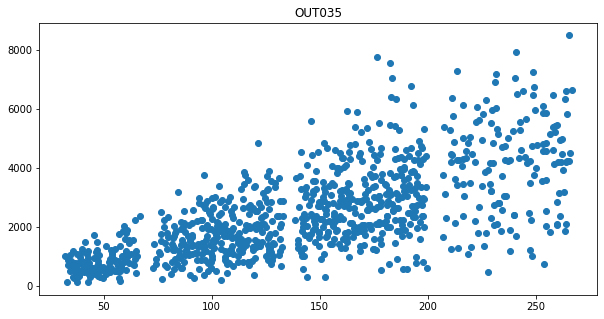

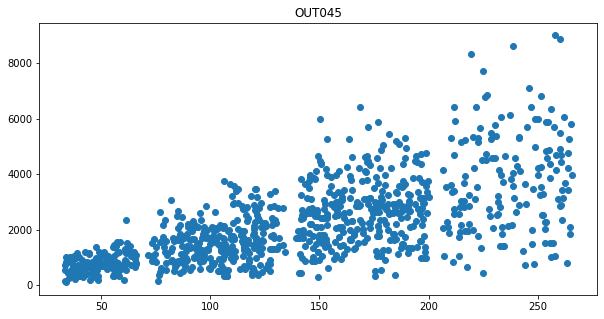

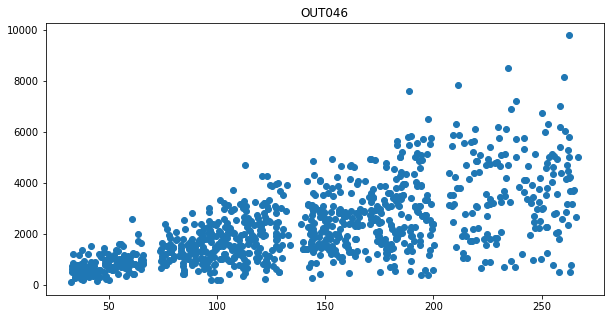

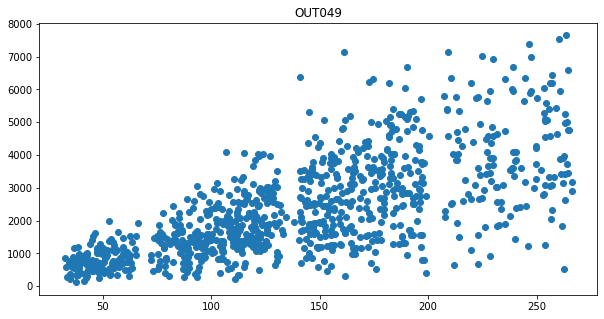

In [154]:
data_by_loc_type = data.groupby('Outlet_Identifier')
for name, group in data_by_loc_type:
    plt.figure(figsize=(10,5))
    plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data=group)
    plt.title(name)
    
    plt.show()

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

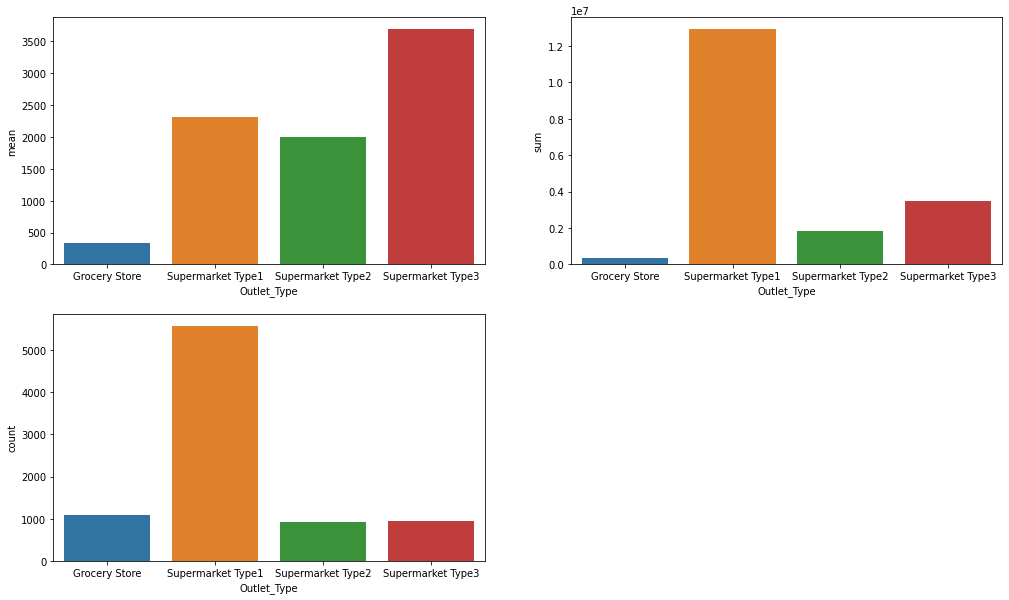

In [155]:
outlets_stat = data.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean','sum', 'count']).reset_index()

plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
sns.barplot(x='Outlet_Type', y='mean', data=outlets_stat)

plt.subplot(2,2,2)
sns.barplot(x='Outlet_Type', y='sum', data=outlets_stat)

plt.subplot(2,2,3)
sns.barplot(x='Outlet_Type', y='count', data=outlets_stat)

<AxesSubplot:xlabel='count', ylabel='Outlet_Identifier'>

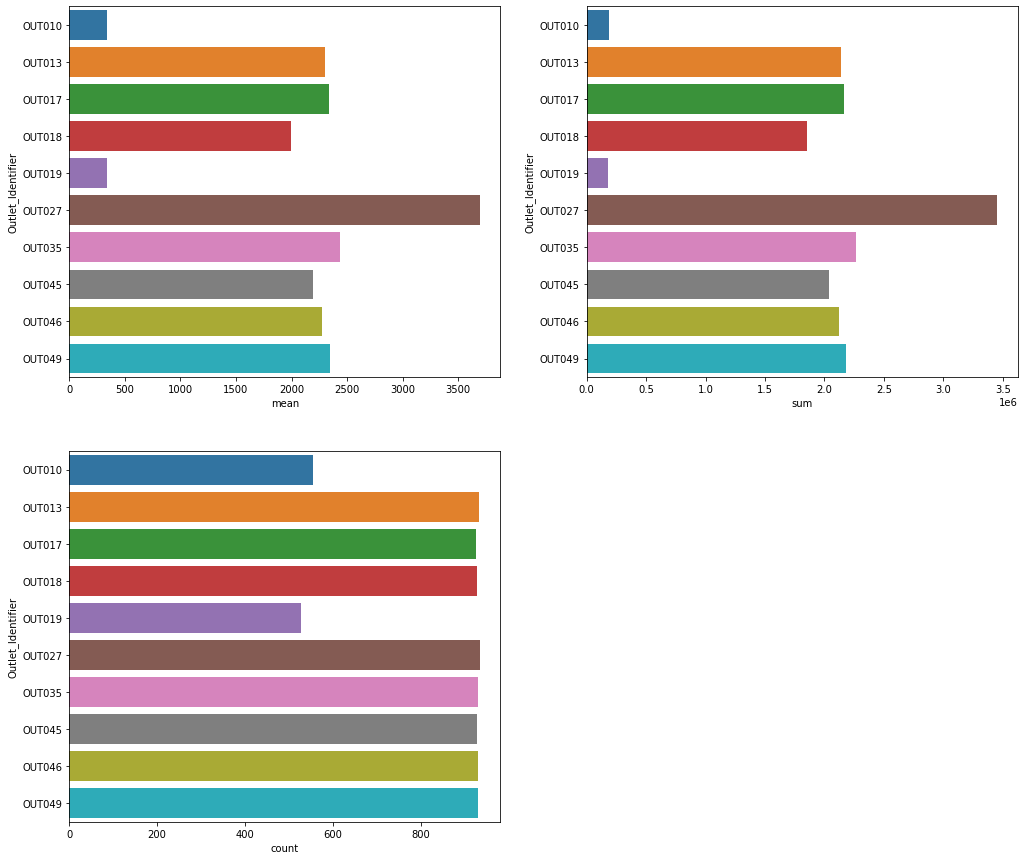

In [156]:
outlet_stat = data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean','sum', 'count']).reset_index()

plt.figure(figsize=(17,15))

plt.subplot(2,2,1)
sns.barplot(y='Outlet_Identifier', x='mean', data=outlet_stat)

plt.subplot(2,2,2)
sns.barplot(y='Outlet_Identifier', x='sum', data=outlet_stat)

plt.subplot(2,2,3)
sns.barplot(y='Outlet_Identifier', x='count', data=outlet_stat)

<AxesSubplot:xlabel='count', ylabel='Outlet_Identifier'>

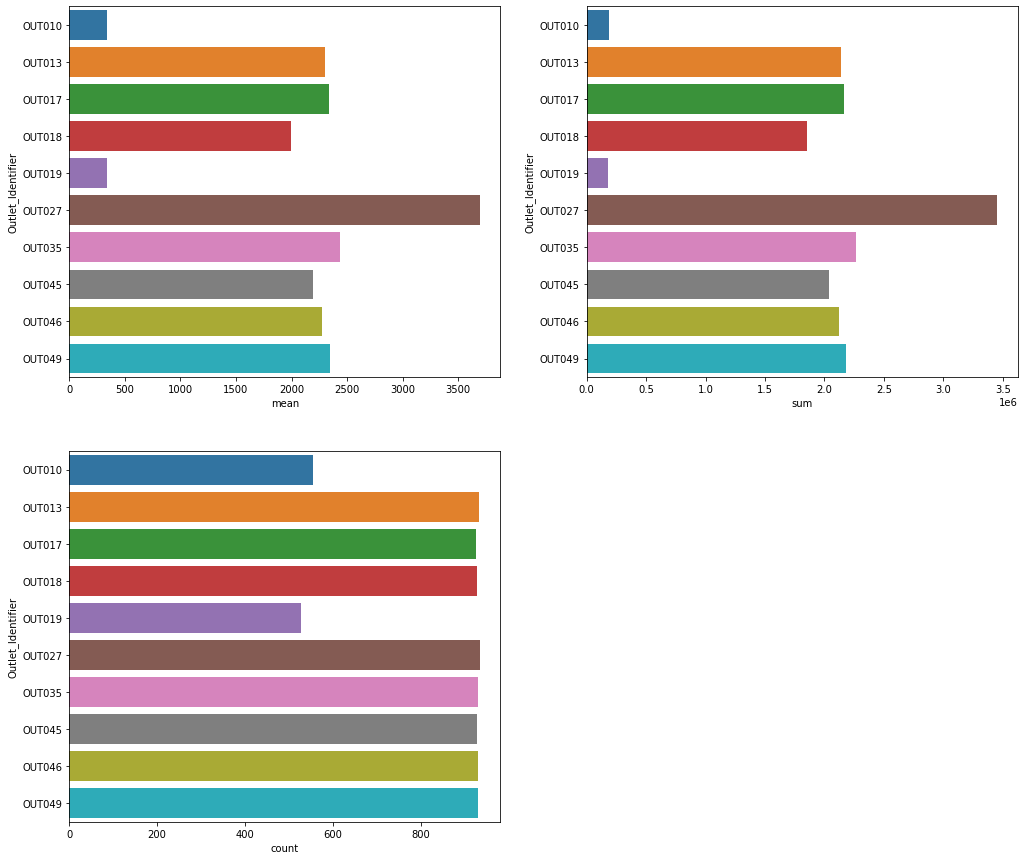

In [157]:


plt.figure(figsize=(17,15))

plt.subplot(2,2,1)
sns.barplot(y='Outlet_Identifier', x='mean', data=outlet_stat)

plt.subplot(2,2,2)
sns.barplot(y='Outlet_Identifier', x='sum', data=outlet_stat)

plt.subplot(2,2,3)
sns.barplot(y='Outlet_Identifier', x='count', data=outlet_stat)

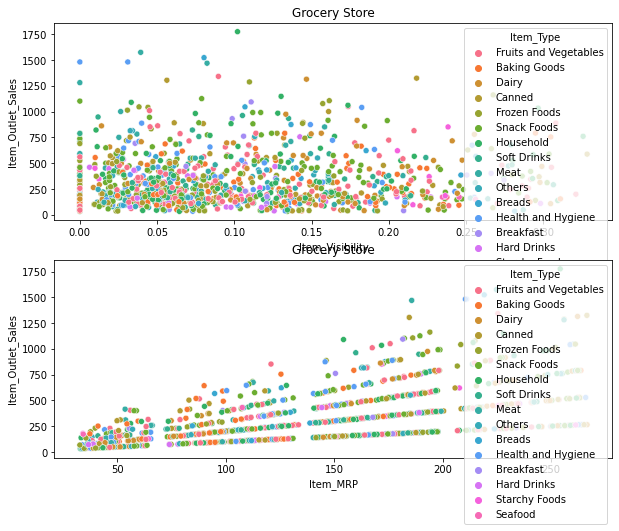

<Figure size 432x288 with 0 Axes>

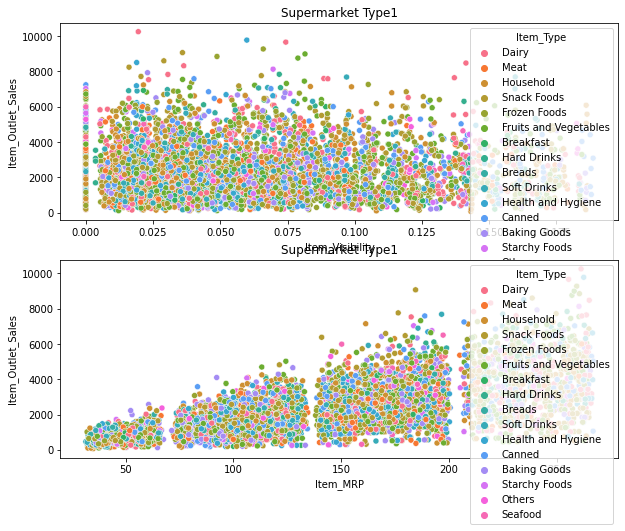

<Figure size 432x288 with 0 Axes>

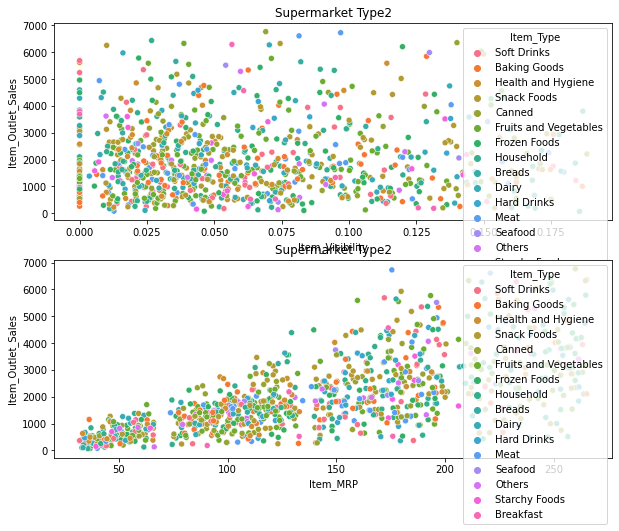

<Figure size 432x288 with 0 Axes>

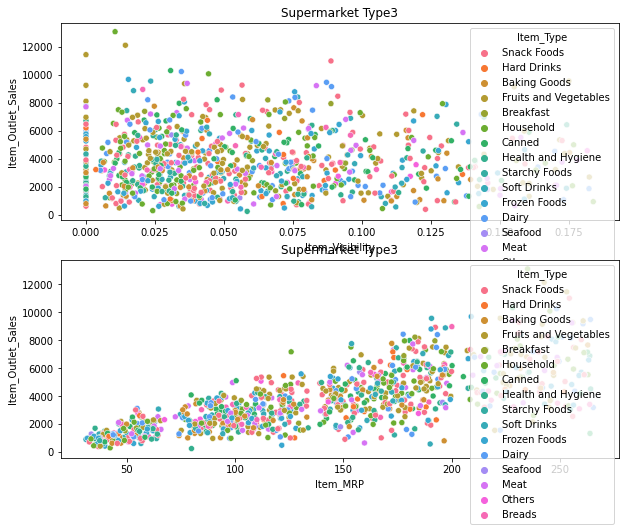

<Figure size 432x288 with 0 Axes>

In [158]:
outlets_grouped = data.groupby('Outlet_Identifier')

for name, group in data_by_type:
    plt.figure(figsize=(10,8))
        
    plt.subplot(2,1,1)
    sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', data=group)
    plt.title(name)

    plt.subplot(2,1,2)
    sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type', data=group)
    plt.title(name)
    
    plt.show()
    plt.subplots_adjust(hspace=0.5)

In [159]:
data.groupby(['Outlet_Type', 'Item_Type'])['Item_Outlet_Sales'].agg(['sum', 'mean', 'count']).sort_values('count',ascending=False).head(20)

sum         mean  count
Outlet_Type       Item_Type                                              
Supermarket Type1 Fruits and Vegetables  1.931958e+06  2399.947642    805
                  Snack Foods            1.889387e+06  2406.862759    785
                  Household              1.437220e+06  2407.403432    597
                  Frozen Foods           1.292668e+06  2259.909110    572
                  Dairy                  1.076694e+06  2392.654389    450
                  Baking Goods           8.954611e+05  2102.021249    426
                  Canned                 1.000560e+06  2348.732970    426
                  Health and Hygiene     7.127549e+05  2127.626505    335
                  Soft Drinks            6.380255e+05  2126.751624    300
                  Meat                   5.810450e+05  2260.875454    257
                  Breads                 3.755085e+05  2346.928355    160
Grocery Store     Fruits and Vegetables  4.860207e+04   319.750450    152
                  Snack Foods            5.159617e+04   353.398432    146
Supermarket Type1 Hard Drinks            3.235542e+05  2231.408037    145
Supermarket Type3 Fruits and Vegetables  5.760282e+05  4114.487061    140
                  Snack Foods            5.130881e+05  3745.168739    137
Supermarket Type2 Fruits and Vegetables  2.634717e+05  1951.642279    135
                  Snack Foods            2.787145e+05  2111.473733    132
Grocery Store     Household              4.370711e+04   367.286612    119
Supermarket Type1 Others                 2.401527e+05  2244.418022    107

<AxesSubplot:>

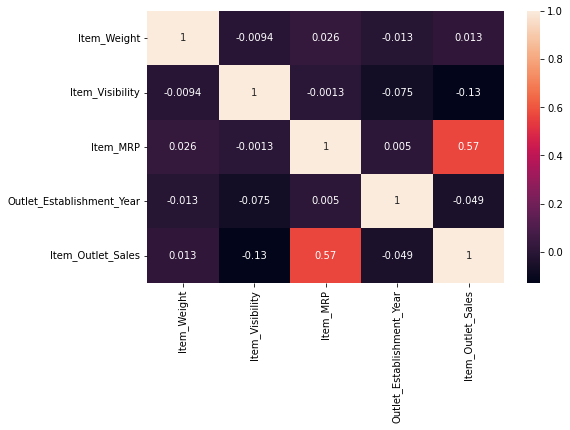

In [160]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)

In [161]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Preparing train, val and test 

In [372]:
X= data.copy()
X.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

Y = data['Item_Outlet_Sales']

X_test = pd.read_csv('Test.csv')

In [373]:
X_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [374]:
X_test['Item_Fat_Content'].replace({'low fat':'Low Fat', 
                                    'LF':'Low Fat',
                                    'reg':'Regular'}, inplace=True)

for item, weight in items_weights.items():
    X_test.loc[data['Item_Identifier']==item ,'Item_Weight'] = weight

outlets_size = X.groupby('Outlet_Identifier')['Outlet_Size'].agg(pd.unique)

for outlet, size in outlets_size.items():
    X_test.loc[(data['Outlet_Identifier']==outlet) & (X_test['Outlet_Size'].isna()) ,'Outlet_Size'] = size

In [375]:
X_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Encoding 

In [376]:
X.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [377]:
X['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [378]:
X['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [379]:
X['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [380]:
X['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [381]:
X['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [382]:
X['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [383]:
X['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)

X_test['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)

#X['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)

In [384]:
#columns for one hot encoding
cols_to_encode = ['Item_Type','Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type']

In [385]:
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()

X['Item_Identifier'] = le_encoder.fit_transform(X['Item_Identifier'])
X_test['Item_Identifier'] = le_encoder.fit(X_test['Item_Identifier'])

In [386]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_encoded = pd.DataFrame(OH_encoder.fit_transform(X[cols_to_encode]), columns=OH_encoder.get_feature_names_out(cols_to_encode)).astype(int)
X_encoded.head()

Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 0                    0   
3                       0                 0                    0   
4                       0                 0                    0   

   Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                 0                1                       0   
1                 0                0                       0   
2                 0                0                       0   
3                 0                0                       0   
4                 0                0                       0   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                1                      0   
4                                0                      0   

   Item_Type_Health and Hygiene  Item_Type_Household  ...  Outlet_Size_High  \
0                             0                    0  ...                 0   
1                             0                    0  ...                 0   
2                             0                    0  ...                 0   
3                             0                    0  ...                 0   
4                             0                    1  ...                 1   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                   1                  0                            1   
1                   1                  0                            0   
2                   1                  0                            1   
3                   0                  1                            0   
4                   0                  0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              0   
2                          0                              1   
3                          1                              0   
4                          0                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 36 columns]

In [387]:
X = pd.concat([X,X_encoded],axis=1)
X.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              156         9.30                 0         0.016047   
1                8         5.92                 1         0.019278   
2              662        17.50                 0         0.016760   
3             1121        19.20                 1         0.000000   
4             1297         8.93                 0         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                       1999      Medium               Tier 1  ...   
1                       2009      Medium               Tier 3  ...   
2                       1999      Medium               Tier 1  ...   
3                       1998       Small               Tier 3  ...   
4                       1987        High               Tier 3  ...   

  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                0                   1                  0   
1                0                   1                  0   
2                0                   1                  0   
3                0                   0                  1   
4                1                   0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 47 columns]

In [388]:
X.drop(cols_to_encode, axis=1, inplace=True)
X.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0              156         9.30                 0         0.016047  249.8092   
1                8         5.92                 1         0.019278   48.2692   
2              662        17.50                 0         0.016760  141.6180   
3             1121        19.20                 1         0.000000  182.0950   
4             1297         8.93                 0         0.000000   53.8614   

   Outlet_Establishment_Year  Item_Type_Baking Goods  Item_Type_Breads  \
0                       1999                       0                 0   
1                       2009                       0                 0   
2                       1999                       0                 0   
3                       1998                       0                 0   
4                       1987                       0                 0   

   Item_Type_Breakfast  Item_Type_Canned  ...  Outlet_Size_High  \
0                    0                 0  ...                 0   
1                    0                 0  ...                 0   
2                    0                 0  ...                 0   
3                    0                 0  ...                 0   
4                    0                 0  ...                 1   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                   1                  0                            1   
1                   1                  0                            0   
2                   1                  0                            1   
3                   0                  1                            0   
4                   0                  0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              0   
2                          0                              1   
3                          1                              0   
4                          0                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 42 columns]

In [389]:
test_encoded = pd.DataFrame(OH_encoder.transform(X_test[cols_to_encode]), columns=OH_encoder.get_feature_names_out(cols_to_encode)).astype(int)
X_test = pd.concat([X_test,test_encoded],axis=1)

X_test.drop(cols_to_encode, axis=1, inplace=True)
X_test.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0  LabelEncoder()         9.30                 0         0.007565  107.8622   
1  LabelEncoder()         5.92                 1         0.038428   87.3198   
2  LabelEncoder()        17.50                 0         0.099575  241.7538   
3  LabelEncoder()        19.20                 0         0.015388  155.0340   
4  LabelEncoder()         8.93                 1         0.118599  234.2300   

   Outlet_Establishment_Year  Item_Type_Baking Goods  Item_Type_Breads  \
0                       1999                       0                 0   
1                       2007                       0                 0   
2                       1998                       0                 0   
3                       2007                       0                 0   
4                       1985                       0                 0   

   Item_Type_Breakfast  Item_Type_Canned  ...  Outlet_Size_High  \
0                    0                 0  ...                 0   
1                    0                 0  ...                 0   
2                    0                 0  ...                 0   
3                    0                 0  ...                 0   
4                    0                 0  ...                 0   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                   1                  0                            1   
1                   1                  0                            0   
2                   1                  0                            0   
3                   0                  1                            0   
4                   1                  0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            1                            0   
2                            0                            1   
3                            1                            0   
4                            0                            1   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              1   
2                          1                              0   
3                          0                              1   
4                          0                              0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              1  

[5 rows x 42 columns]

In [ ]:
#X.drop(['Item_Identifier'], axis=1, inplace=True)
#X_test.drop(['Item_Identifier'], axis=1, inplace=True)

In [391]:
Y = np.log1p(Y) 

c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

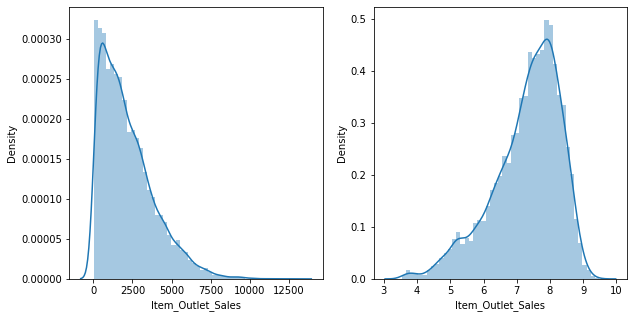

In [392]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['Item_Outlet_Sales'])

plt.subplot(1,2,2)
sns.distplot(Y)

In [393]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cols_to_scale = ['Item_Weight', 'Item_MRP']

scaler = StandardScaler()
ct = ColumnTransformer([('scale', scaler, cols_to_scale)], remainder='passthrough')

X_train_scaled = ct.fit_transform(X_train)
X_val_scaled = ct.transform(X_val)

## Train Test Split

In [394]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=0)

print(f'X_train: {X_train.shape} \nX_val: {X_val.shape} \ny_train: {y_train.shape} \ny_val: {y_val.shape}')

X_train: (6392, 42) 
X_val: (2131, 42) 
y_train: (6392,) 
y_val: (2131,)


# Models:

In [395]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Linear Regression:

In [396]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

print(f'X_Val Score: {LR_model.score(X_val, y_val)}\nX_train Score: {LR_model.score(X_train, y_train)}')

X_Val Score: 0.7101999033015562
X_train Score: 0.7247419846536156


In [362]:
scores = cross_val_score(LR_model, X, Y, cv=5)

# Print mean accuracy and standard deviation of scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.02)


In [363]:
mean_absolute_error(y_train, LR_model.predict(X_train)) , mean_absolute_error(y_val, LR_model.predict(X_val))

(0.05231621228552659, 0.05370083468742541)

## Random Forest

In [364]:
#Random Forest
rand_forest_model = RandomForestRegressor(n_estimators=150, random_state=0)
rand_forest_model.fit(X_train, y_train)

print(f'X_Val Score: {rand_forest_model.score(X_val, y_val)}\nX_train Score: {rand_forest_model.score(X_train, y_train)}')

X_Val Score: 0.7079788812411693
X_train Score: 0.9617803286686768


In [365]:
scores = cross_val_score(rand_forest_model, X, Y, cv=5)

# Print mean accuracy and standard deviation of scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.03)


In [366]:
mean_absolute_error(y_train, rand_forest_model.predict(X_train)) , mean_absolute_error(y_val, rand_forest_model.predict(X_val))

(0.01952694221474594, 0.055454920806993886)

In [369]:
rand_forest_pred = rand_forest_model.predict(X_test)

## XGBoost

In [397]:
XGB_model = XGBRegressor(random_state=0,learning_rate=0.05 )
XGB_model.fit(X_train,y_train,verbose=False)

print(f'X_Val Score: {XGB_model.score(X_val, y_val)}\nX_train Score: {XGB_model.score(X_train, y_train)}')

X_Val Score: 0.7218015091159691
X_train Score: 0.7924345804366651


In [398]:
scores = cross_val_score(XGB_model, X, Y, cv=5)

# Print mean accuracy and standard deviation of scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.73 (+/- 0.03)


In [399]:
mean_absolute_error(y_train, XGB_model.predict(X_train)) , mean_absolute_error(y_val, XGB_model.predict(X_val))

(0.3621268909125985, 0.42181369864517515)

In [401]:
XGB_pred = XGB_model.predict(X_test)

# Saving models

In [250]:
import joblib

In [402]:

joblib.dump(LR_model, 'Linear_regression_model') 

joblib.dump(rand_forest_model, 'Random_forest_model') 

joblib.dump(XGB_model, 'XGBoost_model') 

['XGBoost_model']